# QF 627 Programming and Computational Finance
## Problem-Sets for Exercise `6` | `Questions`

> Hi, Team. 👋

> Here we go again. The current notebook contains 10 questions that help you review our course content.

> Try to answer questions within a 120-minute time limit (and you may refer to lecture notes and review scripts while you are answering). This kind of timed task will improve your performance and prepare you well for the assessment down the line. Once you complete this, submit your script via eLearn.

> Enjoy!"🤞

### For standardization of your answers…

> Please execute the lines of code below before you start work on your answers.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib as mpl

import plotly.express as px 
import plotly.graph_objects as go

from pandas_datareader import data as pdr

import datetime as dt
import yfinance as yf

import warnings
warnings.filterwarnings("ignore")
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter('ignore', ConvergenceWarning)

> Let's set some print option.

In [2]:
np.set_printoptions(precision = 3)

plt.style.use("ggplot")

mpl.rcParams["axes.grid"] = True
mpl.rcParams["grid.color"] = "grey"
mpl.rcParams["grid.alpha"] = 0.25

mpl.rcParams["axes.facecolor"] = "white"

mpl.rcParams["legend.fontsize"] = 14

## 👇 Questions 1 to 4 ask you to build, execute, and backtest a `mean-reversion` strategy.

### <font color = blue> 👉 Question 1</font>. Let’s take a look at Google (`GOOGL`) as our security of interest, over the period of August 2011 to July 2020.

### Use a simple moving average of 42 days.

### Set a threshold value at two standard deviations of the current price, to deviate from the simple moving average to signal a positioning.

### <font color = green> NOTE: Your moving threshold value here is NOT an absolute value. You should create two additional columns containing your two standard deviations relative to your base line (a simple moving average of 42 days). </font>

### Visualize your buy and sell positions.

### Below are the lines of code that lead to an answer:

# <font color = green> For Q1, let us go through step by step, for the remaining questions, we will just use functions when we can </font>

### (a) (i) Simple Moving Average

#### Trading strategy here is that we want to be holding short positions when prices are above the band and holding long positions when prices are below the band. When prices are within the band, we want to be flat (hold no positions)

In [3]:
# yfinance dowwnload DOES NOT include the end date

start="2011-08-01"
end="2020-08-01"

In [4]:
SMA=42
BB_threshold=2

In [5]:
tickers=["GOOGL"]

In [6]:
Google = yf.download(tickers, 
                     start=start, 
                     end=end)

[*********************100%%**********************]  1 of 1 completed


In [7]:
Google=Google[["Adj Close"]]

In [8]:
Google

Adj Close
Date                 
2011-08-01  15.146927
2011-08-02  14.788208
2011-08-03  15.007134
2011-08-04  14.416753
2011-08-05  14.454699
...               ...
2020-07-27  76.282608
2020-07-28  74.996796
2020-07-29  75.987343
2020-07-30  76.728508
2020-07-31  74.213730

[2266 rows x 1 columns]

In [9]:
Google["SMA"]=\
    (
        Google["Adj Close"]
        .rolling(window=SMA,min_periods=SMA)
        .mean()
    )

In [10]:
# Note that standard deviation is calculated using the original price series, not the SMA

Google["Upper_Band"]=\
    (
        Google["SMA"]
        +
        Google["Adj Close"]
        .rolling(window=SMA,min_periods=SMA)
        .std()
        *BB_threshold
    )


Google["Lower_Band"]=\
    (
        Google["SMA"]
        -Google["Adj Close"]
        .rolling(window=SMA,min_periods=SMA)
        .std()
        *BB_threshold
    )

In [11]:
Google.dropna(inplace=True)

In [12]:
# Enter short position (-1) when price is above the upper band. Exit short position and be flat when price returns to within the band.
Google["Position"]=\
    (
        np.where(Google["Adj Close"] 
                 > 
                 Google["Upper_Band"],
                 -1,
                 0))

# Enter long position (1) when price is below the lower band. Exit long position and be flat when price returns to within the band.
Google["Position"]=\
    (
        np.where(Google["Adj Close"] 
                 < 
                 Google["Lower_Band"],
                 1,
                 Google["Position"])
    )

In [13]:
Google["Trades"] =\
(
    Google["Position"]
    .diff()
)

In [14]:
Google

Adj Close        SMA  Upper_Band  Lower_Band  Position  Trades
Date                                                                      
2011-09-28  13.201545  13.502358   14.741357   12.263358         0     NaN
2011-09-29  13.168095  13.455243   14.583542   12.326943         0     0.0
2011-09-30  12.857054  13.409263   14.470376   12.348149         0     0.0
2011-10-03  12.369771  13.346468   14.329388   12.363549         0     0.0
2011-10-04  12.529036  13.301523   14.256136   12.346909         0     0.0
...               ...        ...         ...         ...       ...     ...
2020-07-27  76.282608  73.188262   78.155870   68.220654         0     0.0
2020-07-28  74.996796  73.289689   78.226064   68.353315         0     0.0
2020-07-29  75.987343  73.396556   78.368289   68.424823         0     0.0
2020-07-30  76.728508  73.519466   78.560549   68.478382         0     0.0
2020-07-31  74.213730  73.573665   78.593955   68.553375         0     0.0

[2225 rows x 6 columns]

### <font color = red> Answer 1 is presented in the cell below: </font>

In [15]:
fig = go.Figure()

fig.add_trace(
    go.Scatter(
        x=Google.index, 
        y=Google["Adj Close"], 
        mode='lines', 
        line=dict(color='grey', width=0.75), 
        name='Adj Close'
    )
)

fig.add_trace(
    go.Scatter(
        x=Google.index, 
        y=Google["SMA"], 
        mode='lines', 
        line=dict(color='green', width=0.75), 
        name='SMA'
    )
)

fig.add_trace(
    go.Scatter(
        x=Google.index, 
        y=Google["Upper_Band"], 
        mode='lines', 
        line=dict(color='red', dash='dash', width=0.75), 
        name='Upper Band'
    )
)

fig.add_trace(
    go.Scatter(
        x=Google.index, 
        y=Google["Lower_Band"], 
        mode='lines', 
        line=dict(color='blue', dash='dash', width=0.75), 
        name='Lower Band'
    )
)

fig.add_trace(
    go.Scatter(
        x=Google.index, 
        y=Google["Position"], 
        mode='lines', 
        line=dict(color='orange', width=0.75), 
        name='Position',
        yaxis='y2'  # Assign to secondary axis
    )
)

fig.update_layout(
    title='Google Price, Bollinger Bands, and Position',
    xaxis_title='Date',
    yaxis_title='Google Price',
    yaxis2=dict(
        title="Position", 
        overlaying='y', 
        side='right'
    ),
    width=1200,  
    height=600,  
    legend=dict(
        x=0.6,
        y=1.15,
        xanchor='center',
        yanchor='top',
        orientation='h',
        traceorder='normal',
        bordercolor='Black',
        borderwidth=1
    )
)

# Show figure
fig.show()

In [16]:
fig = go.Figure()

fig.add_trace(
    go.Scatter(
        x=Google.index, 
        y=Google["Adj Close"], 
        mode='lines', 
        line=dict(color='grey', width=0.75), 
        name='Adj Close'
    )
)

fig.add_trace(
    go.Scatter(
        x=Google.index, 
        y=Google["Lower_Band"], 
        mode='lines', 
        line=dict(dash='dash', width=0.80), 
        name='Lower Band'
    )
)
fig.add_trace(
    go.Scatter(
        x=Google.index, 
        y=Google["Upper_Band"], 
        mode='lines', 
        line=dict(dash='dash', width=0.80), 
        name='Upper Band'
    )
)

fig.add_trace(
    go.Scatter(
        x=Google.loc[Google.Trades == 1.0].index, 
        y=Google.Lower_Band[Google.Trades == 1.0], 
        mode='markers', 
        marker=dict(symbol='triangle-up', color='green', size=10), 
        name='BUY Signal'
    )
)

fig.add_trace(
    go.Scatter(
        x=Google.loc[Google.Trades == -1.0].index, 
        y=Google.Upper_Band[Google.Trades == -1.0], 
        mode='markers', 
        marker=dict(symbol='triangle-down', color='red', size=10), 
        name='SELL Signal'
    )
)

fig.update_layout(
    title='Google with Buy/Sell Signals at the Top/Bottom Bands using SMA',
    xaxis_title='Date',
    yaxis_title='Google Price',
    width=1200,  
    height=600   
)

# Show figure
fig.show()

### (a) (ii) Simple Moving Average

#### Trading strategy here is that we want to be holding short positions when prices are above the band and holding long positions when prices are below the band. **When prices crosses the simple moving average, trading positions will be zero (we will be flat).**

In [17]:
# Calculate Distance
Google["distance"] = Google["Adj Close"] - Google["SMA"]

#Initialize the Position column first. 
Google["Position_2"] =\
(
    np.nan
)

# Enter short position (-1) when price is above the upper band. 

Google["Position_2"] =\
(
    np
    .where(Google["Adj Close"]>Google["Upper_Band"],
           -1, Google["Position_2"]
          )
)

# Enter long position (+1) when price is below the lower band. 

Google["Position_2"] =\
(
    np
    .where(Google["Adj Close"]<Google["Lower_Band"],
           1, Google["Position_2"]
          )
)

# Zero-Crossing i.e. when numerical value changes its sign from positive to negative or vice versa
Google["Position_2"] =\
(
    np
    .where(Google["distance"] * Google["distance"].shift(1)<0,
          0, Google["Position_2"]
         )
)

# for holding previous positions
Google["Position_2"] =\
(
    Google["Position_2"]
    .ffill()
)


Google["Trades_2"] =\
(
    Google["Position_2"]
    .diff()
)

In [18]:
fig = go.Figure()

fig.add_trace(
    go.Scatter(
        x=Google.index, 
        y=Google["Adj Close"], 
        mode='lines', 
        line=dict(color='grey', width=0.75), 
        name='Adj Close'
    )
)

fig.add_trace(
    go.Scatter(
        x=Google.index, 
        y=Google["Lower_Band"], 
        mode='lines', 
        line=dict(dash='dash', width=0.80), 
        name='Lower Band'
    )
)
fig.add_trace(
    go.Scatter(
        x=Google.index, 
        y=Google["Upper_Band"], 
        mode='lines', 
        line=dict(dash='dash', width=0.80), 
        name='Upper Band'
    )
)

#Simple Moving Average Line
fig.add_trace(
    go.Scatter(
        x=Google.index, 
        y=Google["SMA"], 
        mode='lines', 
        line=dict(dash='dash', width=0.80), 
        name='SMA'
    )
)

fig.add_trace(
    go.Scatter(
        x=Google.loc[Google.Trades_2 == 1.0].index, 
        y=Google.Lower_Band[Google.Trades_2 == 1.0], 
        mode='markers', 
        marker=dict(symbol='triangle-up', color='green', size=10), 
        name='BUY Signal'
    )
)

fig.add_trace(
    go.Scatter(
        x=Google.loc[Google.Trades_2 == -1.0].index, 
        y=Google.Upper_Band[Google.Trades_2 == -1.0], 
        mode='markers', 
        marker=dict(symbol='triangle-down', color='red', size=10), 
        name='SELL Signal'
    )
)

fig.update_layout(
    title='Stock Price with Buy/Sell Signals - Closing Positions when it crosses moving average using SMA',
    xaxis_title='Date',
    yaxis_title='Stock Price',
    width=1200,  
    height=600   
)

# Show figure
fig.show()

### (b) (i) Exponentially Weighted Moving Average

#### Trading strategy here is that we want to be holding short positions when prices are above the band and holding long positions when prices are below the band. When prices are within the band, we want to be flat (hold no positions)

In [19]:
#Using EWMA of 42 days, giving decay factor of 1-2(42+1)

span = 42

Google["EWMA"]=\
    (
        Google["Adj Close"]
        .ewm(span=span, adjust=False)
        .mean() #Adjust = False -> EWMA Value depends on the previous EWMA and current data point
    )

# Note that standard deviation is calculated using the original price series, not the SMA

Google["Upper_Band_EW"]=\
    (
        Google["EWMA"]
        +
        Google["Adj Close"]
        .ewm(span=span, adjust=False)
        .std()
        *BB_threshold
    )


Google["Lower_Band_EW"]=\
    (
        Google["EWMA"]
        -Google["Adj Close"]
        .ewm(span=span, adjust=False)
        .std()
        *BB_threshold
    )

> Visualize Difference between Simple Moving Average & EWMA

<Axes: xlabel='Date'>

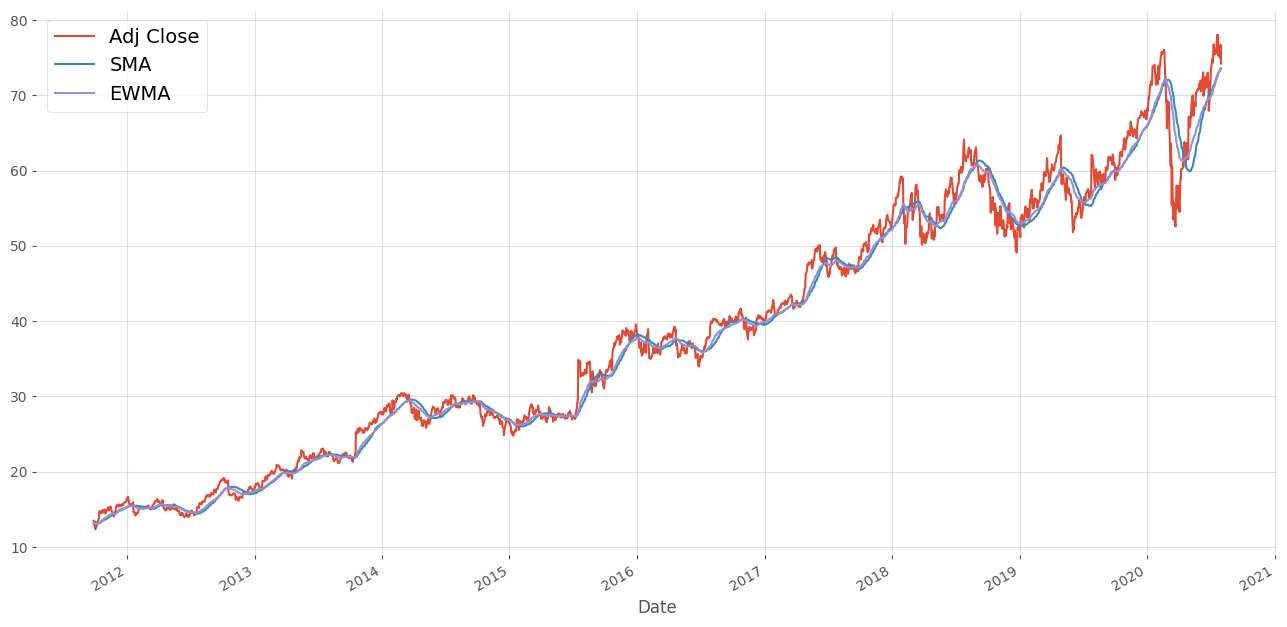

In [20]:
Google[["Adj Close","SMA","EWMA"]].plot(
    figsize=[16,8]
)

In [21]:
# Enter short position (-1) when price is above the upper band. Exit short position and be flat when price returns to within the band.
Google["Position_EW"]=\
    (
        np.where(Google["Adj Close"] 
                 > 
                 Google["Upper_Band_EW"],
                 -1,
                 0)
    )

# Enter long position (1) when price is below the lower band. Exit long position and be flat when price returns to within the band.
Google["Position_EW"]=\
    (
        np.where(Google["Adj Close"] 
                 < 
                 Google["Lower_Band_EW"],
                 1,
                 Google["Position_EW"])
    )

Google["Trades_EW"] =\
(
    Google["Position_EW"]
    .diff()
)

In [22]:
fig = go.Figure()

fig.add_trace(
    go.Scatter(
        x=Google.index, 
        y=Google["Adj Close"], 
        mode='lines', 
        line=dict(color='grey', width=0.75), 
        name='Adj Close'
    )
)

fig.add_trace(
    go.Scatter(
        x=Google.index, 
        y=Google["Lower_Band_EW"], 
        mode='lines', 
        line=dict(dash='dash', width=0.80), 
        name='Lower Band EW'
    )
)

fig.add_trace(
    go.Scatter(
        x=Google.index, 
        y=Google["Upper_Band_EW"], 
        mode='lines', 
        line=dict(dash='dash', width=0.80), 
        name='Upper Band EW'
    )
)

fig.add_trace(
    go.Scatter(
        x=Google.loc[Google.Trades_EW == 1.0].index, 
        y=Google.Lower_Band[Google.Trades_EW == 1.0], 
        mode='markers', 
        marker=dict(symbol='triangle-up', color='green', size=10), 
        name='BUY Signal'
    )
)

fig.add_trace(
    go.Scatter(
        x=Google.loc[Google.Trades_EW == -1.0].index, 
        y=Google.Upper_Band[Google.Trades_EW == -1.0], 
        mode='markers', 
        marker=dict(symbol='triangle-down', color='red', size=10), 
        name='SELL Signal'
    )
)

fig.update_layout(
    title='Google with Buy/Sell Signals at the Top/Bottom Bands using EWMA',
    xaxis_title='Date',
    yaxis_title='Stock Price',
    width=1200,  
    height=600   
)

# Show figure
fig.show()

### (b) (ii) Exponentially Weighted Moving Average

#### Trading strategy here is that we want to be holding short positions when prices are above the band and holding long positions when prices are below the band. **When prices crosses the exponential moving average, trading positions will be zero.**

In [23]:
# Calculate Distance
Google["distance_2"] = Google["Adj Close"] - Google["EWMA"]

#Initialize the Position column first. 
Google["Position_EW_2"] =\
(
    np.nan
)

# Enter short position (-1) when price is above the upper band. 

Google["Position_EW_2"] =\
(
    np
    .where(Google["Adj Close"]>Google["Upper_Band_EW"],
           -1, Google["Position_EW_2"]
          )
)

# Enter long position (+1) when price is below the lower band. 

Google["Position_EW_2"] =\
(
    np
    .where(Google["Adj Close"]<Google["Lower_Band_EW"],
           1, Google["Position_EW_2"]
          )
)

# Zero-Crossing i.e. when numerical value changes its sign from positive to negative or vice versa
Google["Position_EW_2"] =\
(
    np
    .where(Google["distance_2"] * Google["distance_2"].shift(1)<0,
          0, Google["Position_EW_2"]
         )
)

# for holding previous positions
Google["Position_EW_2"] =\
(
    Google["Position_EW_2"]
    .ffill()
)

Google["Trades_EW_2"] =\
(
    Google["Position_EW_2"]
    .diff()
)

In [24]:
fig = go.Figure()

fig.add_trace(
    go.Scatter(
        x=Google.index, 
        y=Google["Adj Close"], 
        mode='lines', 
        line=dict(color='grey', width=0.75), 
        name='Adj Close'
    )
)

fig.add_trace(
    go.Scatter(
        x=Google.index, 
        y=Google["Lower_Band_EW"], 
        mode='lines', 
        line=dict(dash='dash', width=0.80), 
        name='Lower Band EW'
    )
)
fig.add_trace(
    go.Scatter(
        x=Google.index, 
        y=Google["Upper_Band_EW"], 
        mode='lines', 
        line=dict(dash='dash', width=0.80), 
        name='Upper Band EW'
    )
)

#EWMA Line
fig.add_trace(
    go.Scatter(
        x=Google.index, 
        y=Google["EWMA"], 
        mode='lines', 
        line=dict(dash='dash', width=0.80), 
        name='SMA'
    )
)

fig.add_trace(
    go.Scatter(
        x=Google.loc[Google.Trades_EW_2 == 1.0].index, 
        y=Google.Lower_Band[Google.Trades_EW_2 == 1.0], 
        mode='markers', 
        marker=dict(symbol='triangle-up', color='green', size=10), 
        name='BUY Signal'
    )
)

fig.add_trace(
    go.Scatter(
        x=Google.loc[Google.Trades_EW_2 == -1.0].index, 
        y=Google.Upper_Band[Google.Trades_EW_2 == -1.0], 
        mode='markers', 
        marker=dict(symbol='triangle-down', color='red', size=10), 
        name='SELL Signal'
    )
)

fig.update_layout(
    title='Stock Price with Buy/Sell Signals - Closing Positions when it crosses moving average using EWMA',
    xaxis_title='Date',
    yaxis_title='Stock Price',
    width=1400,  
    height=600   
)

# Show figure
fig.show()

### <font color = blue> 👉 Question 2</font>. Let’s expand this strategy to two more securities, Apple (`AAPL`) and Amazon (`AMZN`) over the same period of August 2011 to July 2020. 

### When using the strategy above, which of those two securities has the greater Sharpe Ratio?

### Below are the lines of code that lead to an answer:

### (a) (i) Simple Moving Average

In [25]:
def calculate_BB_Sharpe_ratio (tickers=tickers, 
                               start=start, 
                               end=end, 
                               window: int=SMA, 
                               min_periods: int=SMA, 
                               BB_threshold: int=BB_threshold):
    
    '''
    tickers: Single Ticker that you want to calculate BB Sharpe for
    start: Start of analysis period
    end: End of analysis period
    window: No. of days to calculate SMA and std for BB
    min_periods: Minimum number of days needed to start calculation
    BB_threshold: Std above or below to trigger BB signal
    '''

    BB_df = yf.download(tickers, 
                        start=start, 
                        end=end)
    
    BB_df=BB_df[["Adj Close"]]
    
    BB_df["SMA"]=\
        (
            BB_df["Adj Close"]
            .rolling(window=window,min_periods=min_periods)
            .mean()
        )
        
    BB_df["Upper_Band"]=\
        (
            BB_df["SMA"]
            +
            BB_df["Adj Close"]
            .rolling(window=window,min_periods=min_periods)
            .std()
            *BB_threshold
        )
    
    BB_df["Lower_Band"]=\
        (
            BB_df["SMA"]
            -
            BB_df["Adj Close"]
            .rolling(window=window,min_periods=min_periods)
            .std()
            *BB_threshold
        )

    # Enter short position (-1) when price is above the upper band. Exit short position and be flat when price returns to within the band.
    BB_df["Position"]=\
        (
            np.where(BB_df["Adj Close"] 
                  > 
                  BB_df["Upper_Band"],
                  -1,
                  0)
        )

    # Enter long position (1) when price is below the lower band. Exit long position and be flat when price returns to within the band.
    BB_df["Position"]=\
        (
            np.where(BB_df["Adj Close"] 
                     < 
                     BB_df["Lower_Band"],
                     1,
                     BB_df["Position"])
        )

    BB_df["Trades"] =\
    (
        BB_df["Position"]
        .diff()
    )

    BB_df["log_returns"] =\
    (
        np
        .log(BB_df["Adj Close"] / BB_df["Adj Close"].shift(1)
            )
    )

    BB_df["strategy_returns"] =\
    (
        BB_df["Position"]
        .shift(1) 
        * 
        BB_df["log_returns"]
    )

    BB_df["strategy_cumulative_returns"] = \
        (
            BB_df["strategy_returns"]
            .cumsum()
            .apply(np.exp)
        )

    BB_df.dropna(inplace=True)

    # Calculate the Sharpe ratio
    Sharpe =\
    (
        (
        BB_df["strategy_returns"].mean() 
        / 
        BB_df["strategy_returns"].std()
        ) * np.sqrt(252)
    )
    
    print (f"The Sharpe of a Bollinger Band strategy on {tickers} over this time period with a window of {window} days and threshold of {BB_threshold} SD is {Sharpe:.2f}")
    
    return BB_df


In [26]:
Apple = calculate_BB_Sharpe_ratio(tickers="AAPL", 
                                  start=start, 
                                  end=end, 
                                  window=SMA, 
                                  min_periods=SMA, 
                                  BB_threshold=BB_threshold)

Amazon = calculate_BB_Sharpe_ratio(tickers="AMZN", 
                                   start=start, 
                                   end=end, 
                                   window=SMA, 
                                   min_periods=SMA, 
                                   BB_threshold=BB_threshold)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

The Sharpe of a Bollinger Band strategy on AAPL over this time period with a window of 42 days and threshold of 2 SD is 0.18
The Sharpe of a Bollinger Band strategy on AMZN over this time period with a window of 42 days and threshold of 2 SD is -0.13


### <font color = red> Answer 2 </font>

    The answer is Apple .

### (a) (ii) Simple Moving Average

In [27]:
def calculate_BB_Sharpe_ratio_2 (tickers=tickers, 
                               start=start, 
                               end=end, 
                               window: int=SMA, 
                               min_periods: int=SMA, 
                               BB_threshold: int=BB_threshold):
    
    '''
    tickers: Single Ticker that you want to calculate BB Sharpe for
    start: Start of analysis period
    end: End of analysis period
    window: No. of days to calculate SMA and std for BB
    min_periods: Minimum number of days needed to start calculation
    BB_threshold: Std above or below to trigger BB signal
    '''

    BB_df = yf.download(tickers, 
                        start=start, 
                        end=end)
    
    BB_df=BB_df[["Adj Close"]]
    
    BB_df["SMA"]=\
        (
            BB_df["Adj Close"]
            .rolling(window=window,min_periods=min_periods)
            .mean()
        )
        
    BB_df["Upper_Band"]=\
        (
            BB_df["SMA"]
            +
            BB_df["Adj Close"]
            .rolling(window=window,min_periods=min_periods)
            .std()
            *BB_threshold
        )
    
    BB_df["Lower_Band"]=\
        (
            BB_df["SMA"]
            -
            BB_df["Adj Close"]
            .rolling(window=window,min_periods=min_periods)
            .std()
            *BB_threshold
        )
    
    # Calculate Distance
    BB_df["distance"] = BB_df["Adj Close"] - BB_df["SMA"]
    
    #Initialize the Position column first. 
    BB_df["Position_2"] =\
    (
        np.nan
    )
    
    # Enter short position (-1) when price is above the upper band. 
    
    BB_df["Position_2"] =\
    (
        np
        .where(BB_df["Adj Close"]>BB_df["Upper_Band"],
               -1, BB_df["Position_2"]
              )
    )
    
    # Enter long position (+1) when price is below the lower band. 
    
    BB_df["Position_2"] =\
    (
        np
        .where(BB_df["Adj Close"]<BB_df["Lower_Band"],
               1, BB_df["Position_2"]
              )
    )
    
    # Zero-Crossing i.e. when numerical value changes its sign from positive to negative or vice versa
    BB_df["Position_2"] =\
    (
        np
        .where(BB_df["distance"] * BB_df["distance"].shift(1)<0,
              0, BB_df["Position_2"]
             )
    )
    
    # for holding previous positions
    BB_df["Position_2"] =\
    (
        BB_df["Position_2"]
        .ffill()
    )
    
    BB_df["Trades_2"] =\
    (
        BB_df["Position_2"]
        .diff()
    )

    BB_df["log_returns"] =\
    (
        np
        .log(BB_df["Adj Close"] / BB_df["Adj Close"].shift(1)
            )
    )

    BB_df["strategy_returns"] =\
    (
        BB_df["Position_2"]
        .shift(1) 
        * 
        BB_df["log_returns"]
    )

    BB_df["strategy_cumulative_returns"] = \
        (
            BB_df["strategy_returns"]
            .cumsum()
            .apply(np.exp)
        )

    BB_df.dropna(inplace=True)

    # Calculate the Sharpe ratio
    Sharpe =\
    (
        (
        BB_df["strategy_returns"].mean() 
        / 
        BB_df["strategy_returns"].std()
        ) * np.sqrt(252)
    )
    
    print (f"The Sharpe of a Bollinger Band strategy on {tickers} over this time period with a window of {window} days and threshold of {BB_threshold} SD is {Sharpe:.2f}")
    
    return BB_df


In [28]:
Apple = calculate_BB_Sharpe_ratio_2(tickers="AAPL", 
                                  start=start, 
                                  end=end, 
                                  window=SMA, 
                                  min_periods=SMA, 
                                  BB_threshold=BB_threshold)

Amazon = calculate_BB_Sharpe_ratio_2(tickers="AMZN", 
                                   start=start, 
                                   end=end, 
                                   window=SMA, 
                                   min_periods=SMA, 
                                   BB_threshold=BB_threshold)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

The Sharpe of a Bollinger Band strategy on AAPL over this time period with a window of 42 days and threshold of 2 SD is -0.41
The Sharpe of a Bollinger Band strategy on AMZN over this time period with a window of 42 days and threshold of 2 SD is -0.28


### <font color = red> Answer 2_2 </font>

    The answer is AMZN .

### (b) (i) Exponential Moving Average

In [29]:
EWMA=42
def calculate_BB_Sharpe_ratio_EW (tickers=tickers, 
                               start=start, 
                               end=end, 
                               window: int=EWMA, 
                               BB_threshold: int=BB_threshold):
    
    '''
    tickers: Single Ticker that you want to calculate BB Sharpe for
    start: Start of analysis period
    end: End of analysis period
    window: No. of days to calculate EWMA and std for BB
    BB_threshold: Std above or below to trigger BB signal
    '''

    BB_df = yf.download(tickers, 
                        start=start, 
                        end=end)
    
    BB_df=BB_df[["Adj Close"]]
    
    BB_df["EWMA"]=\
        (
            BB_df["Adj Close"]
            .ewm(span=window, adjust=False)
            .mean() #Adjust = False -> EWMA Value depends on the previous EWMA and current data point
        )
        
    BB_df["Upper_Band_EW"]=\
        (
            BB_df["EWMA"]
            +
            BB_df["Adj Close"]
            .ewm(span=span, adjust=False)
            .std()
            *BB_threshold
        )
    
    BB_df["Lower_Band_EW"]=\
        (
            BB_df["EWMA"]
            -
            BB_df["Adj Close"]
            .ewm(span=span, adjust=False)
            .std()
            *BB_threshold
        )

    # Enter short position (-1) when price is above the upper band. Exit short position and be flat when price returns to within the band.
    BB_df["Position"]=\
        (
            np.where(BB_df["Adj Close"] 
                  > 
                  BB_df["Upper_Band_EW"],
                  -1,
                  0)
        )

    # Enter long position (1) when price is below the lower band. Exit long position and be flat when price returns to within the band.
    BB_df["Position"]=\
        (
            np.where(BB_df["Adj Close"] 
                     < 
                     BB_df["Lower_Band_EW"],
                     1,
                     BB_df["Position"])
        )

    BB_df["Trades"] =\
    (
        BB_df["Position"]
        .diff()
    )

    BB_df["log_returns"] =\
    (
        np
        .log(BB_df["Adj Close"] / BB_df["Adj Close"].shift(1)
            )
    )

    BB_df["strategy_returns"] =\
    (
        BB_df["Position"]
        .shift(1) 
        * 
        BB_df["log_returns"]
    )

    BB_df["strategy_cumulative_returns"] = \
        (
            BB_df["strategy_returns"]
            .cumsum()
            .apply(np.exp)
        )

    BB_df.dropna(inplace=True)

    # Calculate the Sharpe ratio
    Sharpe =\
    (
        (
        BB_df["strategy_returns"].mean() 
        / 
        BB_df["strategy_returns"].std()
        ) * np.sqrt(252)
    )
    
    print (f"The Sharpe of a Bollinger Band strategy on {tickers} over this time period with a window of {window} days and threshold of {BB_threshold} SD is {Sharpe:.2f}")
    
    return BB_df


In [30]:
Apple = calculate_BB_Sharpe_ratio_EW(tickers="AAPL", 
                                  start=start, 
                                  end=end, 
                                  window=EWMA, 
                                  BB_threshold=BB_threshold)

Amazon = calculate_BB_Sharpe_ratio_EW(tickers="AMZN", 
                                   start=start, 
                                   end=end, 
                                   window=EWMA, 
                                   BB_threshold=BB_threshold)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

The Sharpe of a Bollinger Band strategy on AAPL over this time period with a window of 42 days and threshold of 2 SD is 0.30
The Sharpe of a Bollinger Band strategy on AMZN over this time period with a window of 42 days and threshold of 2 SD is 0.20


In [31]:
EWMA=42
def calculate_BB_Sharpe_ratio_EW_2 (tickers=tickers, 
                               start=start, 
                               end=end, 
                               window: int=EWMA, 
                               BB_threshold: int=BB_threshold):
    
    '''
    tickers: Single Ticker that you want to calculate BB Sharpe for
    start: Start of analysis period
    end: End of analysis period
    window: No. of days to calculate EWMA and std for BB
    BB_threshold: Std above or below to trigger BB signal
    '''

    BB_df = yf.download(tickers, 
                        start=start, 
                        end=end)
    
    BB_df=BB_df[["Adj Close"]]
    
    BB_df["EWMA"]=\
        (
            BB_df["Adj Close"]
            .ewm(span=window, adjust=False)
            .mean() #Adjust = False -> EWMA Value depends on the previous EWMA and current data point
        )
        
    BB_df["Upper_Band_EW"]=\
        (
            BB_df["EWMA"]
            +
            BB_df["Adj Close"]
            .ewm(span=window, adjust=False)
            .std()
            *BB_threshold
        )
    
    BB_df["Lower_Band_EW"]=\
        (
            BB_df["EWMA"]
            -
            BB_df["Adj Close"]
            .ewm(span=window, adjust=False)
            .std()
            *BB_threshold
        )
    
    # Calculate Distance
    BB_df["distance_2"] = BB_df["Adj Close"] - BB_df["EWMA"]
    
    #Initialize the Position column first. 
    BB_df["Position_EW_2"] =\
    (
        np.nan
    )
    
    # Enter short position (-1) when price is above the upper band. 
    
    BB_df["Position_EW_2"] =\
    (
        np
        .where(BB_df["Adj Close"]>BB_df["Upper_Band_EW"],
               -1, BB_df["Position_EW_2"]
              )
    )
    
    # Enter long position (+1) when price is below the lower band. 
    
    BB_df["Position_EW_2"] =\
    (
        np
        .where(BB_df["Adj Close"]<BB_df["Lower_Band_EW"],
               1, BB_df["Position_EW_2"]
              )
    )
    
    # Zero-Crossing i.e. when numerical value changes its sign from positive to negative or vice versa
    BB_df["Position_EW_2"] =\
    (
        np
        .where(BB_df["distance_2"] * BB_df["distance_2"].shift(1)<0,
              0, BB_df["Position_EW_2"]
             )
    )
    
    # for holding previous positions
    BB_df["Position_EW_2"] =\
    (
        BB_df["Position_EW_2"]
        .ffill()
    )
    
    
    BB_df["Trades_EW_2"] =\
    (
        BB_df["Position_EW_2"]
        .diff()
    )

    BB_df["log_returns"] =\
    (
        np
        .log(BB_df["Adj Close"] / BB_df["Adj Close"].shift(1)
            )
    )

    BB_df["strategy_returns"] =\
    (
        BB_df["Position_EW_2"]
        .shift(1) 
        * 
        BB_df["log_returns"]
    )

    BB_df["strategy_cumulative_returns"] = \
        (
            BB_df["strategy_returns"]
            .cumsum()
            .apply(np.exp)
        )

    BB_df.dropna(inplace=True)

    # Calculate the Sharpe ratio
    Sharpe =\
    (
        (
        BB_df["strategy_returns"].mean() 
        / 
        BB_df["strategy_returns"].std()
        ) * np.sqrt(252)
    )
    
    print (f"The Sharpe of a Bollinger Band strategy on {tickers} over this time period with a window of {window} days and threshold of {BB_threshold} SD is {Sharpe:.2f}")
    
    return BB_df


In [32]:
Apple = calculate_BB_Sharpe_ratio_EW_2(tickers="AAPL", 
                                  start=start, 
                                  end=end, 
                                  window=EWMA, 
                                  BB_threshold=BB_threshold)

Amazon = calculate_BB_Sharpe_ratio_EW_2(tickers="AMZN", 
                                   start=start, 
                                   end=end, 
                                   window=EWMA, 
                                   BB_threshold=BB_threshold)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

The Sharpe of a Bollinger Band strategy on AAPL over this time period with a window of 42 days and threshold of 2 SD is -0.32
The Sharpe of a Bollinger Band strategy on AMZN over this time period with a window of 42 days and threshold of 2 SD is -0.48


### TLDR; Sharpe increases when we avoid exiting positions as the price approaches average i.e. enter/exit at the upper and lower bands and when using exponentially weighted average for calculations.

-----------------------

### <font color = blue> 👉 Question 3</font>. Let’s suppose that you started from a `$200,000` capital base for each of the three securities.

### Disregarding commission, how much will you have in the end in your account for each of the securities as a result of the mean-reversion strategy-based trading?

### Below are the lines of code that lead to an answer:

In [33]:
initial_capital = 200000
commission = 0

### (a) (i) Simple Moving Average

In [34]:
def calculate_BB_capital (tickers=tickers, 
                          start=start, 
                          end=end, 
                          window: int=SMA, 
                          min_periods: int=SMA, 
                          BB_threshold: int=BB_threshold, 
                          initial_capital: int=initial_capital, 
                          commission: int=commission):
    
    '''
    tickers: Single Ticker that you want to calculate BB capital for
    start: Start of analysis period
    end: End of analysis period
    window: No. of days to calculate SMA and std for BB
    min_periods: Minimum number of days needed to start calculation
    BB_threshold: Std above or below to trigger BB signal
    initial_capital: Starting capital for the strategy
    commission: Trading commission for each trade
    '''

    BB_df = yf.download(tickers, 
                        start=start, 
                        end=end)
    
    BB_df=BB_df[["Adj Close"]]
    
    BB_df["SMA"]=\
        (
            BB_df["Adj Close"]
            .rolling(window=window,min_periods=min_periods)
            .mean()
        )
        
    BB_df["Upper_Band"]=\
        (
            BB_df["SMA"]
            +
            BB_df["Adj Close"]
            .rolling(window=window,min_periods=min_periods)
            .std()
            *BB_threshold
        )
    
    BB_df["Lower_Band"]=\
        (
            BB_df["SMA"]
            -
            BB_df["Adj Close"]
            .rolling(window=window,min_periods=min_periods)
            .std()
            *BB_threshold
        )

    # Enter short position (-1) when price is above the upper band. Exit short position and be flat when price returns to within the band.
    BB_df["Position"]=\
        (
            np.where(BB_df["Adj Close"] 
                  > 
                  BB_df["Upper_Band"],
                  -1,
                  0)
        )

    # Enter long position (1) when price is below the lower band. Exit long position and be flat when price returns to within the band.
    BB_df["Position"]=\
        (
            np.where(BB_df["Adj Close"] 
                     < 
                     BB_df["Lower_Band"],
                     1,
                     BB_df["Position"])
        )

    BB_df["Trades"] =\
    (
        BB_df["Position"]
        .diff()
    )

    BB_df["log_returns"] =\
    (
        np
        .log(BB_df["Adj Close"] / BB_df["Adj Close"].shift(1)
            )
    )

    BB_df["strategy_returns"] =\
    (
        BB_df["Position"]
        .shift(1) 
        * 
        BB_df["log_returns"]
    )

    BB_df["strategy_cumulative_returns"] = BB_df["strategy_returns"].cumsum().apply(np.exp)

    BB_df.dropna(inplace=True)
    
    BB_df["Capital"]=np.nan
    
    # Set the first value of Capital to the initial value (initial_capital)
    BB_df.iloc[0, BB_df.columns.get_loc("Capital")] = initial_capital
    
    for row in range(1, len(BB_df)):
        
        Trade=abs(BB_df.iloc[row, BB_df.columns.get_loc("Trades")])

        # Update the capital based on the previous capital and strategy returns
        BB_df.iloc[row, BB_df.columns.get_loc("Capital")] = BB_df.iloc[row-1, BB_df.columns.get_loc("Capital")] * \
            (np.exp(BB_df.iloc[row, BB_df.columns.get_loc("strategy_returns")])) - Trade * commission
    
    Final_Capital=BB_df.iloc[-1, BB_df.columns.get_loc("Capital")]
    
    print (f"The final capital of a Bollinger Band strategy on {tickers} over this time period with a window of {window} days, threshold of {BB_threshold} SD and starting capital of ${initial_capital} is ${Final_Capital:.2f}")
           
    return BB_df

In [35]:
Google_1 = calculate_BB_capital(tickers="GOOGL", 
                                   start=start, 
                                   end=end, 
                                   window=SMA, 
                                   min_periods=SMA, 
                                   BB_threshold=BB_threshold, 
                                   initial_capital=initial_capital, 
                                   commission=commission)

[*********************100%%**********************]  1 of 1 completed


The final capital of a Bollinger Band strategy on GOOGL over this time period with a window of 42 days, threshold of 2 SD and starting capital of $200000 is $237007.88


In [36]:
Apple_1 = calculate_BB_capital(tickers="AAPL", 
                                   start=start, 
                                   end=end, 
                                   window=SMA, 
                                   min_periods=SMA, 
                                   BB_threshold=BB_threshold, 
                                   initial_capital=initial_capital, 
                                   commission=commission)

[*********************100%%**********************]  1 of 1 completed


The final capital of a Bollinger Band strategy on AAPL over this time period with a window of 42 days, threshold of 2 SD and starting capital of $200000 is $241990.93


In [37]:
Amazon_1 = calculate_BB_capital(tickers="AMZN", 
                                   start=start, 
                                   end=end, 
                                   window=SMA, 
                                   min_periods=SMA, 
                                   BB_threshold=BB_threshold, 
                                   initial_capital=initial_capital, 
                                   commission=commission)

[*********************100%%**********************]  1 of 1 completed


The final capital of a Bollinger Band strategy on AMZN over this time period with a window of 42 days, threshold of 2 SD and starting capital of $200000 is $173822.06


### <font color = red> Answer 3 (a) (i)</font>

    GOOGL : $237,007.88 
    
    AAPL  : $241,990.93 
     
    AMZN  : $173,822.06 
    

### (a) (ii) Simple Moving Average

In [38]:
def calculate_BB_capital_2 (tickers=tickers, 
                          start=start, 
                          end=end, 
                          window: int=SMA, 
                          min_periods: int=SMA, 
                          BB_threshold: int=BB_threshold, 
                          initial_capital: int=initial_capital, 
                          commission: int=commission):
    
    '''
    tickers: Single Ticker that you want to calculate BB capital for
    start: Start of analysis period
    end: End of analysis period
    window: No. of days to calculate SMA and std for BB
    min_periods: Minimum number of days needed to start calculation
    BB_threshold: Std above or below to trigger BB signal
    initial_capital: Starting capital for the strategy
    commission: Trading commission for each trade
    '''

    BB_df = yf.download(tickers, 
                        start=start, 
                        end=end)
    
    BB_df=BB_df[["Adj Close"]]
    
    BB_df["SMA"]=\
        (
            BB_df["Adj Close"]
            .rolling(window=window,min_periods=min_periods)
            .mean()
        )
        
    BB_df["Upper_Band"]=\
        (
            BB_df["SMA"]
            +
            BB_df["Adj Close"]
            .rolling(window=window,min_periods=min_periods)
            .std()
            *BB_threshold
        )
    
    BB_df["Lower_Band"]=\
        (
            BB_df["SMA"]
            -
            BB_df["Adj Close"]
            .rolling(window=window,min_periods=min_periods)
            .std()
            *BB_threshold
        )

    # Calculate Distance
    BB_df["distance"] = BB_df["Adj Close"] - BB_df["SMA"]
    
    #Initialize the Position column first. 
    BB_df["Position_2"] =\
    (
        np.nan
    )
    
    # Enter short position (-1) when price is above the upper band. 
    
    BB_df["Position_2"] =\
    (
        np
        .where(BB_df["Adj Close"]>BB_df["Upper_Band"],
               -1, BB_df["Position_2"]
              )
    )
    
    # Enter long position (+1) when price is below the lower band. 
    
    BB_df["Position_2"] =\
    (
        np
        .where(BB_df["Adj Close"]<BB_df["Lower_Band"],
               1, BB_df["Position_2"]
              )
    )
    
    # Zero-Crossing i.e. when numerical value changes its sign from positive to negative or vice versa
    BB_df["Position_2"] =\
    (
        np
        .where(BB_df["distance"] * BB_df["distance"].shift(1)<0,
              0, BB_df["Position_2"]
             )
    )
    
    # for holding previous positions
    BB_df["Position_2"] =\
    (
        BB_df["Position_2"]
        .ffill()
    )
    
    
    BB_df["Trades_2"] =\
    (
        BB_df["Position_2"]
        .diff()
    )


    BB_df["log_returns"] =\
    (
        np
        .log(BB_df["Adj Close"] / BB_df["Adj Close"].shift(1)
            )
    )

    BB_df["strategy_returns"] =\
    (
        BB_df["Position_2"]
        .shift(1) 
        * 
        BB_df["log_returns"]
    )

    BB_df["strategy_cumulative_returns"] = BB_df["strategy_returns"].cumsum().apply(np.exp)

    BB_df.dropna(inplace=True)
    
    BB_df["Capital"]=np.nan
    
    # Set the first value of Capital to the initial value (initial_capital)
    BB_df.iloc[0, BB_df.columns.get_loc("Capital")] = initial_capital
    
    for row in range(1, len(BB_df)):
        
        Trade=abs(BB_df.iloc[row, BB_df.columns.get_loc("Trades_2")])

        # Update the capital based on the previous capital and strategy returns
        BB_df.iloc[row, BB_df.columns.get_loc("Capital")] = BB_df.iloc[row-1, BB_df.columns.get_loc("Capital")] * \
            (np.exp(BB_df.iloc[row, BB_df.columns.get_loc("strategy_returns")])) - Trade * commission
    
    Final_Capital=BB_df.iloc[-1, BB_df.columns.get_loc("Capital")]
    
    print (f"The final capital of a Bollinger Band strategy on {tickers} over this time period with a window of {window} days, threshold of {BB_threshold} SD and starting capital of ${initial_capital} is ${Final_Capital:.2f}")
           
    return BB_df

In [39]:
Google_2 = calculate_BB_capital_2(tickers="GOOGL", 
                                   start=start, 
                                   end=end, 
                                   window=SMA, 
                                   min_periods=SMA, 
                                   BB_threshold=BB_threshold, 
                                   initial_capital=initial_capital, 
                                   commission=commission)

Apple_2 = calculate_BB_capital_2(tickers="AAPL", 
                                   start=start, 
                                   end=end, 
                                   window=SMA, 
                                   min_periods=SMA, 
                                   BB_threshold=BB_threshold, 
                                   initial_capital=initial_capital, 
                                   commission=commission)

Amazon_2 = calculate_BB_capital_2(tickers="AMZN", 
                                   start=start, 
                                   end=end, 
                                   window=SMA, 
                                   min_periods=SMA, 
                                   BB_threshold=BB_threshold, 
                                   initial_capital=initial_capital, 
                                   commission=commission)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

The final capital of a Bollinger Band strategy on GOOGL over this time period with a window of 42 days, threshold of 2 SD and starting capital of $200000 is $231686.77
The final capital of a Bollinger Band strategy on AAPL over this time period with a window of 42 days, threshold of 2 SD and starting capital of $200000 is $85535.08


The final capital of a Bollinger Band strategy on AMZN over this time period with a window of 42 days, threshold of 2 SD and starting capital of $200000 is $112025.82


### <font color = red> Answer 3 (a)(ii) </font>

    GOOGL : $231,686.77 
    
    AAPL  : $85,535.08 
     
    AMZN  : $112,025.82

### (b) (i) Exponential Moving Average

In [40]:
EWMA = 42

def calculate_BB_capital_EW (tickers=tickers, 
                          start=start, 
                          end=end, 
                          window: int=EWMA, 
                          BB_threshold: int=BB_threshold, 
                          initial_capital: int=initial_capital, 
                          commission: int=commission):
    
    '''
    tickers: Single Ticker that you want to calculate BB capital for
    start: Start of analysis period
    end: End of analysis period
    window: No. of days to calculate SMA and std for BB
    BB_threshold: Std above or below to trigger BB signal
    initial_capital: Starting capital for the strategy
    commission: Trading commission for each trade
    '''

    BB_df = yf.download(tickers, 
                        start=start, 
                        end=end)
    
    BB_df=BB_df[["Adj Close"]]
    
    BB_df["EWMA"]=\
        (
            BB_df["Adj Close"]
            .ewm(span=EWMA, adjust=False) #Adjust = False -> EWMA Value depends on the previous EWMA and current data point
            .mean()
        )
        
    BB_df["Upper_Band"]=\
        (
            BB_df["EWMA"]
            +
            BB_df["Adj Close"]
            .ewm(span=EWMA, adjust=False)
            .std()
            *BB_threshold
        )
    
    BB_df["Lower_Band"]=\
        (
            BB_df["EWMA"]
            -
            BB_df["Adj Close"]
            .ewm(span=EWMA, adjust=False)
            .std()
            *BB_threshold
        )

    # Enter short position (-1) when price is above the upper band. Exit short position and be flat when price returns to within the band.
    BB_df["Position"]=\
        (
            np.where(BB_df["Adj Close"] 
                  > 
                  BB_df["Upper_Band"],
                  -1,
                  0)
        )

    # Enter long position (1) when price is below the lower band. Exit long position and be flat when price returns to within the band.
    BB_df["Position"]=\
        (
            np.where(BB_df["Adj Close"] 
                     < 
                     BB_df["Lower_Band"],
                     1,
                     BB_df["Position"])
        )

    BB_df["Trades"] =\
    (
        BB_df["Position"]
        .diff()
    )

    BB_df["log_returns"] =\
    (
        np
        .log(BB_df["Adj Close"] / BB_df["Adj Close"].shift(1)
            )
    )

    BB_df["strategy_returns"] =\
    (
        BB_df["Position"]
        .shift(1) 
        * 
        BB_df["log_returns"]
    )

    BB_df["strategy_cumulative_returns"] = BB_df["strategy_returns"].cumsum().apply(np.exp)

    BB_df.dropna(inplace=True)
    
    BB_df["Capital"]=np.nan
    
    # Set the first value of Capital to the initial value (initial_capital)
    BB_df.iloc[0, BB_df.columns.get_loc("Capital")] = initial_capital
    
    for row in range(1, len(BB_df)):
        
        Trade=abs(BB_df.iloc[row, BB_df.columns.get_loc("Trades")])

        # Update the capital based on the previous capital and strategy returns
        BB_df.iloc[row, BB_df.columns.get_loc("Capital")] = BB_df.iloc[row-1, BB_df.columns.get_loc("Capital")] * \
            (np.exp(BB_df.iloc[row, BB_df.columns.get_loc("strategy_returns")])) - Trade * commission
    
    Final_Capital=BB_df.iloc[-1, BB_df.columns.get_loc("Capital")]
    
    print (f"The final capital of a Bollinger Band strategy using exponential weights on {tickers} over this time period with a window of {window} days, threshold of {BB_threshold} SD and starting capital of ${initial_capital} is ${Final_Capital:.2f}")
           
    return BB_df

In [41]:
Google_3 = calculate_BB_capital_EW(tickers="GOOGL", 
                                   start=start, 
                                   end=end, 
                                   window=EWMA, 
                                   BB_threshold=BB_threshold, 
                                   initial_capital=initial_capital, 
                                   commission=commission)

Apple_3 = calculate_BB_capital_EW(tickers="AAPL", 
                                   start=start, 
                                   end=end, 
                                   window=EWMA, 
                                   BB_threshold=BB_threshold, 
                                   initial_capital=initial_capital, 
                                   commission=commission)

Amazon_3 = calculate_BB_capital_EW(tickers="AMZN", 
                                   start=start, 
                                   end=end, 
                                   window=EWMA, 
                                   BB_threshold=BB_threshold, 
                                   initial_capital=initial_capital, 
                                   commission=commission)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

The final capital of a Bollinger Band strategy using exponential weights on GOOGL over this time period with a window of 42 days, threshold of 2 SD and starting capital of $200000 is $220394.01
The final capital of a Bollinger Band strategy using exponential weights on AAPL over this time period with a window of 42 days, threshold of 2 SD and starting capital of $200000 is $229811.08


The final capital of a Bollinger Band strategy using exponential weights on AMZN over this time period with a window of 42 days, threshold of 2 SD and starting capital of $200000 is $213085.57


### <font color = red> Answer 3 (b)(i) </font>

    GOOGL : $220,394.01 
    
    AAPL  : $229,811.08 
     
    AMZN  : $213,085.57 

### (b) (ii) Exponential Moving Average

In [42]:
EWMA = 42

def calculate_BB_capital_EW_2 (tickers=tickers, 
                          start=start, 
                          end=end, 
                          window: int=EWMA, 
                          BB_threshold: int=BB_threshold, 
                          initial_capital: int=initial_capital, 
                          commission: int=commission):
    
    '''
    tickers: Single Ticker that you want to calculate BB capital for
    start: Start of analysis period
    end: End of analysis period
    window: No. of days to calculate SMA and std for BB
    min_periods: Minimum number of days needed to start calculation
    BB_threshold: Std above or below to trigger BB signal
    initial_capital: Starting capital for the strategy
    commission: Trading commission for each trade
    '''

    BB_df = yf.download(tickers, 
                        start=start, 
                        end=end)
    
    BB_df=BB_df[["Adj Close"]]
    
    BB_df["EWMA"]=\
        (
            BB_df["Adj Close"]
            .ewm(span=EWMA, adjust=False) #Adjust = False -> EWMA Value depends on the previous EWMA and current data point
            .mean()
        )
        
    BB_df["Upper_Band"]=\
        (
            BB_df["EWMA"]
            +
            BB_df["Adj Close"]
            .ewm(span=EWMA, adjust=False)
            .std()
            *BB_threshold
        )
    
    BB_df["Lower_Band"]=\
        (
            BB_df["EWMA"]
            -
            BB_df["Adj Close"]
            .ewm(span=EWMA, adjust=False)
            .std()
            *BB_threshold
        )

   # Calculate Distance
    BB_df["distance"] = BB_df["Adj Close"] - BB_df["EWMA"]
    
    #Initialize the Position column first. 
    BB_df["Position_2"] =\
    (
        np.nan
    )
    
    # Enter short position (-1) when price is above the upper band. 
    
    BB_df["Position_2"] =\
    (
        np
        .where(BB_df["Adj Close"]>BB_df["Upper_Band"],
               -1, BB_df["Position_2"]
              )
    )
    
    # Enter long position (+1) when price is below the lower band. 
    
    BB_df["Position_2"] =\
    (
        np
        .where(BB_df["Adj Close"]<BB_df["Lower_Band"],
               1, BB_df["Position_2"]
              )
    )
    
    # Zero-Crossing i.e. when numerical value changes its sign from positive to negative or vice versa
    BB_df["Position_2"] =\
    (
        np
        .where(BB_df["distance"] * BB_df["distance"].shift(1)<0,
              0, BB_df["Position_2"]
             )
    )
    
    # for holding previous positions
    BB_df["Position_2"] =\
    (
        BB_df["Position_2"]
        .ffill()
    )
    
    
    BB_df["Trades_2"] =\
    (
        BB_df["Position_2"]
        .diff()
    )

    BB_df["log_returns"] =\
    (
        np
        .log(BB_df["Adj Close"] / BB_df["Adj Close"].shift(1)
            )
    )

    BB_df["strategy_returns"] =\
    (
        BB_df["Position_2"]
        .shift(1) 
        * 
        BB_df["log_returns"]
    )

    BB_df["strategy_cumulative_returns"] = BB_df["strategy_returns"].cumsum().apply(np.exp)

    BB_df.dropna(inplace=True)
    
    BB_df["Capital"]=np.nan
    
    # Set the first value of Capital to the initial value (initial_capital)
    BB_df.iloc[0, BB_df.columns.get_loc("Capital")] = initial_capital
    
    for row in range(1, len(BB_df)):
        
        Trade=abs(BB_df.iloc[row, BB_df.columns.get_loc("Trades_2")])

        # Update the capital based on the previous capital and strategy returns
        BB_df.iloc[row, BB_df.columns.get_loc("Capital")] = BB_df.iloc[row-1, BB_df.columns.get_loc("Capital")] * \
            (np.exp(BB_df.iloc[row, BB_df.columns.get_loc("strategy_returns")])) - Trade * commission
    
    Final_Capital=BB_df.iloc[-1, BB_df.columns.get_loc("Capital")]
    
    print (f"The final capital of a Bollinger Band strategy using exponential weights on {tickers} over this time period with a window of {window} days, threshold of {BB_threshold} SD and starting capital of ${initial_capital} is ${Final_Capital:.2f}")
           
    return BB_df

In [43]:
Google_4 = calculate_BB_capital_EW_2(tickers="GOOGL", 
                                   start=start, 
                                   end=end, 
                                   window=EWMA, 
                                   BB_threshold=BB_threshold, 
                                   initial_capital=initial_capital, 
                                   commission=commission)

Apple_4 = calculate_BB_capital_EW_2(tickers="AAPL", 
                                   start=start, 
                                   end=end, 
                                   window=EWMA, 
                                   BB_threshold=BB_threshold, 
                                   initial_capital=initial_capital, 
                                   commission=commission)

Amazon_4 = calculate_BB_capital_EW_2(tickers="AMZN", 
                                   start=start, 
                                   end=end, 
                                   window=EWMA, 
                                   BB_threshold=BB_threshold, 
                                   initial_capital=initial_capital, 
                                   commission=commission)

[*********************100%%**********************]  1 of 1 completed


The final capital of a Bollinger Band strategy using exponential weights on GOOGL over this time period with a window of 42 days, threshold of 2 SD and starting capital of $200000 is $217789.16


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

The final capital of a Bollinger Band strategy using exponential weights on AAPL over this time period with a window of 42 days, threshold of 2 SD and starting capital of $200000 is $125477.80


The final capital of a Bollinger Band strategy using exponential weights on AMZN over this time period with a window of 42 days, threshold of 2 SD and starting capital of $200000 is $104895.32


### <font color = red> Answer 3 (b)(ii) </font>

    GOOGL : $217,789.16 
    
    AAPL  : $125,477.80 
     
    AMZN  : $104,895.32 

### TLDR; Final Capital is the highest when we avoid exiting positions as the price approaches average i.e. enter/exit at the upper and lower bands and when using exponentially weighted average for calculations.

### <font color = blue> 👉 Question 4</font>. What are the compound annual growth rates of each of the securities, based on the current mean-reversion strategy-based trading? 

### Below are the lines of code that lead to an answer:

In [44]:
def calculate_CAGR (BB_df:pd.DataFrame,
                    name:str):
    
    '''
    BB_df: Dataframe that you want to calculate CAGR for
    name: Name of the stock you are performing the BB strategy on
    '''
    
    Days =\
    (
        (
            BB_df
            .index[-1]
            - 
            BB_df
            .index[0]     
        ).days
    )

    CAGR=\
    (
        (
            (
                (BB_df["Capital"][-1] / BB_df["Capital"][0])  
            ) ** (365.0 / Days)
        ) -1
    )*100
    
    print (f'The CAGR of {name} using a BB strategy is {CAGR:.2f}% ')

### Mean Reversion with Simple Moving Average - Buy/Sell at Top/Bottom Bands

In [45]:
calculate_CAGR (BB_df=Google_1, 
                name="Google")

calculate_CAGR (BB_df=Apple_1, 
                name="Apple")

calculate_CAGR (BB_df=Amazon_1, 
                name="Amazon")

The CAGR of Google using a BB strategy is 1.94% 
The CAGR of Apple using a BB strategy is 2.18% 
The CAGR of Amazon using a BB strategy is -1.57% 


### Mean Reversion with Simple Moving Average - Buy/Sell at Top/Bottom Bands & When Crosses SMA

In [46]:
calculate_CAGR (BB_df=Google_2, 
                name="Google")

calculate_CAGR (BB_df=Apple_2, 
                name="Apple")

calculate_CAGR (BB_df=Amazon_2, 
                name="Amazon")

The CAGR of Google using a BB strategy is 1.68% 
The CAGR of Apple using a BB strategy is -9.17% 
The CAGR of Amazon using a BB strategy is -6.40% 


### Mean Reversion with EWMA - Buy/Sell at Top/Bottom Bands

In [47]:
calculate_CAGR (BB_df=Google_3, 
                name="Google")

calculate_CAGR (BB_df=Apple_3, 
                name="Apple")

calculate_CAGR (BB_df=Amazon_3, 
                name="Amazon")

The CAGR of Google using a BB strategy is 1.08% 
The CAGR of Apple using a BB strategy is 1.56% 
The CAGR of Amazon using a BB strategy is 0.71% 


### Mean Reversion with EWMA - Buy/Sell at Top/Bottom Bands & When Crosses EWMA

In [48]:
calculate_CAGR (BB_df=Google_4, 
                name="Google")

calculate_CAGR (BB_df=Apple_4, 
                name="Apple")

calculate_CAGR (BB_df=Amazon_4, 
                name="Amazon")

The CAGR of Google using a BB strategy is 0.95% 
The CAGR of Apple using a BB strategy is -5.05% 
The CAGR of Amazon using a BB strategy is -6.97% 


### <font color = red> Answer 4 </font>

    GOOGL : 1.94% 
    
    AAPL  : 2.18% 
    
    AMZN  : -1.57% 

## 👇 Questions 5 and 7 ask you to predict the future market direction. Let's focus on analyzing `GE`. `These questions are designed to help deepen your understanding of the key points covered in the Lesson 5 lecture notes`. While answering, please make sure to revisit and refer to the `Lecture 5 notebook`.

###  <font color = blue> 👉 Question 5. </font> First, predict tomorrow's log returns using today's returns, yesterday's returns, and the day before yesterday's returns — a total of three lags. 

### Next, predict tomorrow's log returns using a lag of 10 days. 

### Finally, predict tomorrow's log returns using a lag of 22 days. 

### You can achieve this using the least squares function in the numpy library's linear algebra module. 

### Then, plot the gross performance of the base instrument and the three strategies that can be constructed based on these three lagged variables over time. 

### This analysis is conducted in-sample and does not consider transaction costs. </font>

### Below are the lines of code that lead to an answer:

# <font color = green> Let us do step by step for lag 3 before using function for lag 10 and 22.</font>

In [49]:
# Assume same time period of analysis as previous questions. Remember yfinance doesnt download end date
start="2011-08-01"
end="2020-08-01"

In [50]:
tickers=["GE"]

In [51]:
GE = yf.download(tickers, start=start, end=end)

[*********************100%%**********************]  1 of 1 completed


In [52]:
GE=GE[["Adj Close"]]

In [53]:
GE["log_returns"] =\
    (
        np
        .log(GE["Adj Close"] / GE["Adj Close"].shift(1)
            )
    )

In [54]:
GE = GE.dropna()

In [55]:
LAGS = 3

In [56]:
COLS = []

In [57]:
for LAG in range(1, LAGS + 1):
    COL = f"lag_{LAG}"
    GE[COL] = GE["log_returns"].shift(LAG)
    COLS.append(COL)

In [58]:
GE = GE.dropna()

In [59]:
GE

Adj Close  log_returns     lag_1     lag_2     lag_3
Date                                                            
2011-08-05  60.227524     0.002426 -0.058945  0.014995 -0.043213
2011-08-08  56.287727    -0.067653  0.002426 -0.058945  0.014995
2011-08-09  58.221153     0.033772 -0.067653  0.002426 -0.058945
2011-08-10  55.047424    -0.056054  0.033772 -0.067653  0.002426
2011-08-11  57.199741     0.038354 -0.056054  0.033772 -0.067653
...               ...          ...       ...       ...       ...
2020-07-27  32.847603    -0.022108 -0.025901 -0.002837  0.002837
2020-07-28  33.728764     0.026472 -0.022108 -0.025901 -0.002837
2020-07-29  32.260159    -0.044518  0.026472 -0.022108 -0.025901
2020-07-30  30.644712    -0.051373 -0.044518  0.026472 -0.022108
2020-07-31  29.714600    -0.030822 -0.051373 -0.044518  0.026472

[2262 rows x 5 columns]

### <font color = red>Note that you are doing your regression across the entire time series at once (from August 2011 to July 2020), there is look-ahead bias in your results. The single set of coefficients that you obtain uses data from the entire time period, but you won't know these coefficients until the end</font>

In [60]:
# Note that there is no constant term in this 

OLS =\
    np \
    .linalg \
    .lstsq(GE[COLS],
           GE["log_returns"],
           rcond = None)[0]

OLS

array([-0.038,  0.06 ,  0.016])

In [61]:
GE["PREDICTION"] =\
    np \
    .dot(GE[COLS],
         OLS)


In [62]:
GE

Adj Close  log_returns     lag_1     lag_2     lag_3  PREDICTION
Date                                                                        
2011-08-05  60.227524     0.002426 -0.058945  0.014995 -0.043213    0.002426
2011-08-08  56.287727    -0.067653  0.002426 -0.058945  0.014995   -0.003362
2011-08-09  58.221153     0.033772 -0.067653  0.002426 -0.058945    0.001749
2011-08-10  55.047424    -0.056054  0.033772 -0.067653  0.002426   -0.005282
2011-08-11  57.199741     0.038354 -0.056054  0.033772 -0.067653    0.003034
...               ...          ...       ...       ...       ...         ...
2020-07-27  32.847603    -0.022108 -0.025901 -0.002837  0.002837    0.000863
2020-07-28  33.728764     0.026472 -0.022108 -0.025901 -0.002837   -0.000751
2020-07-29  32.260159    -0.044518  0.026472 -0.022108 -0.025901   -0.002753
2020-07-30  30.644712    -0.051373 -0.044518  0.026472 -0.022108    0.002910
2020-07-31  29.714600    -0.030822 -0.051373 -0.044518  0.026472   -0.000265

[2262 rows x 6 columns]

The prediction has far lower variance than the actual

<Axes: xlabel='Date'>

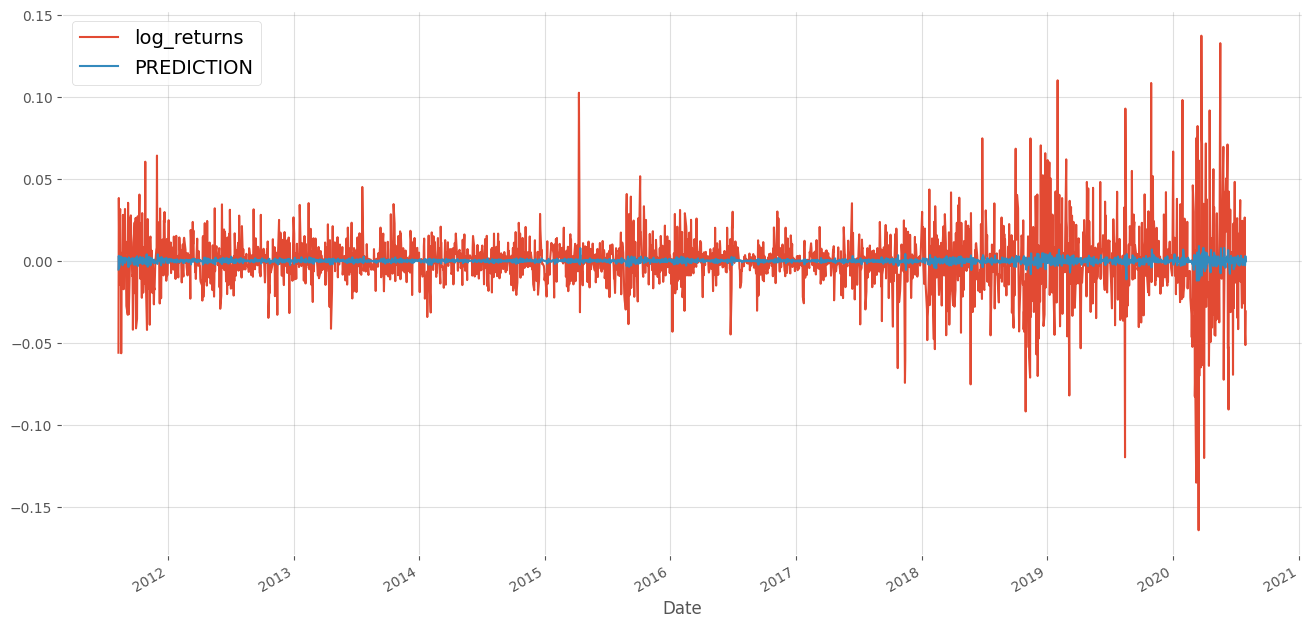

In [63]:
GE \
    [["log_returns", "PREDICTION"]] \
    .iloc[LAGS: ] \
    .plot(figsize = (16, 8)
         )

In [64]:
GE["PREDICTED_DIRECTION"]=np.sign(GE["PREDICTION"])

In [65]:
GE["STRATEGY"] = GE["PREDICTED_DIRECTION"] * GE["log_returns"]

In [66]:
GE["STRATEGY_CUMULATIVE_RETURNS"] = \
    (
    GE["STRATEGY"].cumsum()
    .apply(np.exp)
    )

In [67]:
GE

Adj Close  log_returns     lag_1     lag_2     lag_3  PREDICTION  \
Date                                                                           
2011-08-05  60.227524     0.002426 -0.058945  0.014995 -0.043213    0.002426   
2011-08-08  56.287727    -0.067653  0.002426 -0.058945  0.014995   -0.003362   
2011-08-09  58.221153     0.033772 -0.067653  0.002426 -0.058945    0.001749   
2011-08-10  55.047424    -0.056054  0.033772 -0.067653  0.002426   -0.005282   
2011-08-11  57.199741     0.038354 -0.056054  0.033772 -0.067653    0.003034   
...               ...          ...       ...       ...       ...         ...   
2020-07-27  32.847603    -0.022108 -0.025901 -0.002837  0.002837    0.000863   
2020-07-28  33.728764     0.026472 -0.022108 -0.025901 -0.002837   -0.000751   
2020-07-29  32.260159    -0.044518  0.026472 -0.022108 -0.025901   -0.002753   
2020-07-30  30.644712    -0.051373 -0.044518  0.026472 -0.022108    0.002910   
2020-07-31  29.714600    -0.030822 -0.051373 -0.044518  0.026472   -0.000265   

            PREDICTED_DIRECTION  STRATEGY  STRATEGY_CUMULATIVE_RETURNS  
Date                                                                    
2011-08-05                  1.0  0.002426                     1.002429  
2011-08-08                 -1.0  0.067653                     1.072593  
2011-08-09                  1.0  0.033772                     1.109435  
2011-08-10                 -1.0  0.056054                     1.173399  
2011-08-11                  1.0  0.038354                     1.219278  
...                         ...       ...                          ...  
2020-07-27                  1.0 -0.022108                     1.571960  
2020-07-28                 -1.0 -0.026472                     1.530892  
2020-07-29                 -1.0  0.044518                     1.600585  
2020-07-30                  1.0 -0.051373                     1.520434  
2020-07-31                 -1.0  0.030822                     1.568026  

[2262 rows x 9 columns]

Even after seeing the entire dataset, the regression does poorly in predicting the direction of movement of the stock

In [68]:
#ACCURACY =\
np \
.sign(GE["log_returns"] * GE["PREDICTION"]
     ) \
.value_counts(normalize=True)

 1.0    0.502653
-1.0    0.480548
 0.0    0.016799
Name: proportion, dtype: float64

In [69]:
GE \
    [["log_returns", "STRATEGY"]] \
    .sum() \
    .apply(np.exp)

log_returns    0.494571
STRATEGY       1.568026
dtype: float64

<Axes: xlabel='Date'>

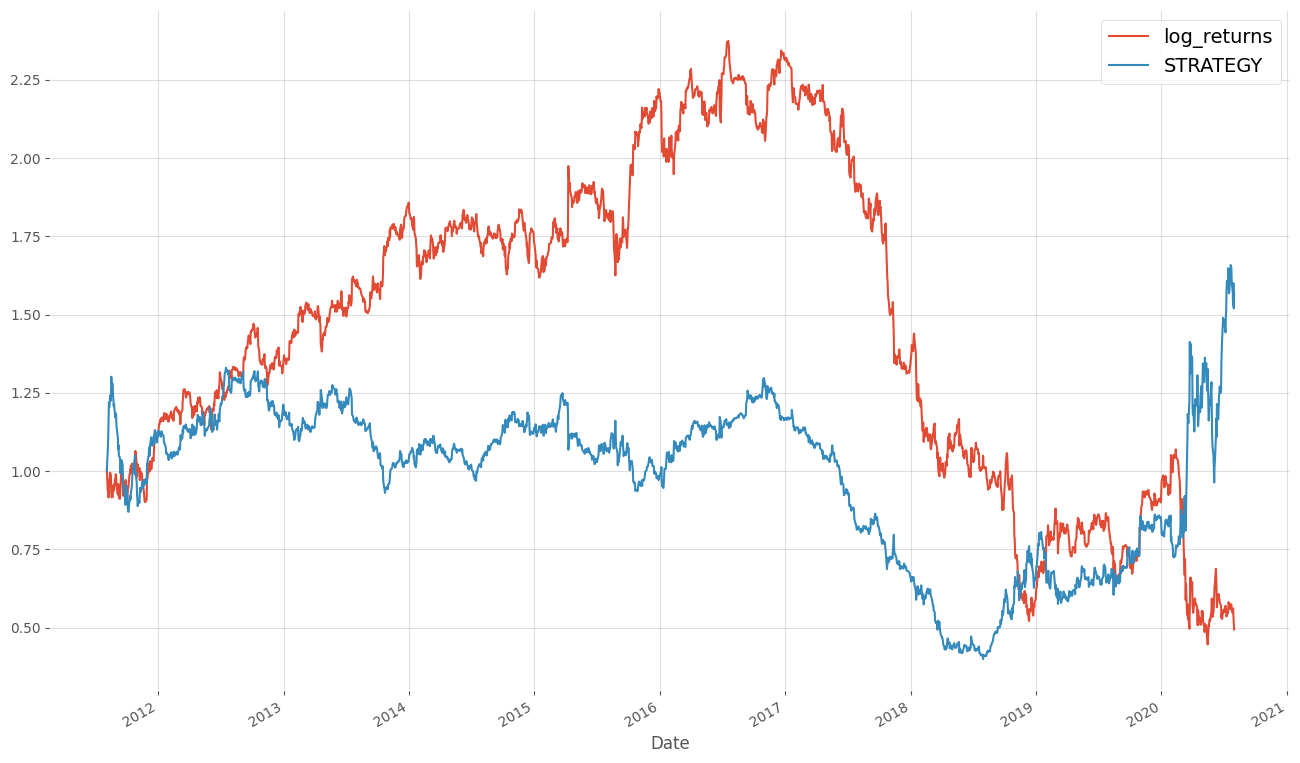

In [70]:
GE \
    [["log_returns", "STRATEGY"]] \
    .dropna() \
    .cumsum() \
    .apply(np.exp) \
    .plot(figsize = (16,10)
         )

#### Creating a function to do the analysis for lag 10 and 22

In [71]:
def calculate_regression_returns (tickers=tickers, start=start, end=end, LAGS=LAGS):
    
    # Download price data
    regression_df = yf.download(tickers, start=start, end=end)
    regression_df=regression_df[["Adj Close"]]
    
    # Calculate log returns
    regression_df["log_returns"] =\
    (
        np
        .log(regression_df["Adj Close"] / regression_df["Adj Close"].shift(1)
            )
    )
    
    regression_df = regression_df.dropna()
    
    # Create lagged returns columns
    COLS = []
    
    for LAG in range(1, LAGS + 1):
        COL = f"lag_{LAG}"
        regression_df[COL] = regression_df["log_returns"].shift(LAG)
        COLS.append(COL)
        
    regression_df = regression_df.dropna()
    
    # Note the lookahead bias problem here
    # Perform OLS regression using lstsq
    OLS =\
        np \
        .linalg \
        .lstsq(regression_df[COLS],
               regression_df["log_returns"],
               rcond = None)[0]
    
    # Make predictions
    regression_df["PREDICTION"] =\
        np \
        .dot(regression_df[COLS],
             OLS)
    
    # Predict direction (sign of predicted returns)
    regression_df["PREDICTED_DIRECTION"]=np.sign(regression_df["PREDICTION"])
    
    # Strategy returns based on predicted direction
    regression_df["STRATEGY"] = \
        (
        regression_df["PREDICTED_DIRECTION"] * 
        regression_df["log_returns"]
        )
    
    regression_df["STRATEGY_CUMULATIVE_RETURNS"] = \
        (
        regression_df["STRATEGY"].cumsum()
        .apply(np.exp)
        )
     
    ACCURACY =\
        np \
        .sign(regression_df["log_returns"] * regression_df["PREDICTION"]
            ) \
        .value_counts(normalize=True)
       
    print(ACCURACY) 
    
    # Plot predicted against actual returns  
    fig = go.Figure()

    fig.add_trace(go.Scatter(
        x=regression_df.index[LAG:], 
        y=regression_df["log_returns"].iloc[LAG:], 
        mode='lines', 
        name='Log Returns'
    ))

    fig.add_trace(go.Scatter(
        x=regression_df.index[LAG:], 
        y=regression_df["PREDICTION"].iloc[LAG:], 
        mode='lines', 
        name='Prediction'
    ))

    fig.update_layout(
        title="Actual vs Predicted Log Returns",
        xaxis_title="Date",
        yaxis_title="Log Returns",
        width=1200,  
        height=500
    )

    fig.show()
    
    # To plot cumulative returns of strategy and underlying asset
    cumulative_returns = \
        (
            regression_df[["log_returns", "STRATEGY"]]
            .dropna()
            .cumsum()
            .apply(np.exp)
        )
    
    fig = go.Figure()

    fig.add_trace(go.Scatter(
        x=cumulative_returns.index, 
        y=cumulative_returns["log_returns"], 
        mode='lines', 
        name='Cumulative Log Returns'
    ))

    fig.add_trace(go.Scatter(
        x=cumulative_returns.index, 
        y=cumulative_returns["STRATEGY"], 
        mode='lines', 
        name='Cumulative Strategy Returns'
    ))

    fig.update_layout(
        title="Cumulative Returns: Actual vs Strategy",
        xaxis_title="Date",
        yaxis_title="Cumulative Returns",
        width=1200,  
        height=600
    )

    fig.show()
       
    return regression_df

### <font color = red> Answer 5 </font>

    The answer is shown in the below plot.

In [72]:
GE_lag3 = calculate_regression_returns (tickers="GE", 
                                        start=start, 
                                        end=end, 
                                        LAGS=3)

[*********************100%%**********************]  1 of 1 completed

 1.0    0.502653
-1.0    0.480548
 0.0    0.016799
Name: proportion, dtype: float64


In [73]:
GE_lag10 = calculate_regression_returns (tickers="GE", 
                                         start=start, 
                                         end=end, 
                                         LAGS=10)

[*********************100%%**********************]  1 of 1 completed

 1.0    0.504213
-1.0    0.478936
 0.0    0.016851
Name: proportion, dtype: float64


# <font color = red>The OLS overfits to the periods of higher volatility as it tries to reduce least squares, that is why your returns are so good during Covid, because that is when volatility is highest</font>

In [74]:
GE_lag22 = calculate_regression_returns (tickers="GE", 
                                         start=start, 
                                         end=end, 
                                         LAGS=22)

[*********************100%%**********************]  1 of 1 completed

 1.0    0.506019
-1.0    0.477040
 0.0    0.016942
Name: proportion, dtype: float64


# Rolling Regression

#### What if we try regression without lookahead bias?

In [75]:
import math
import statsmodels.api as sm
from statsmodels.regression.rolling import RollingOLS

In [76]:
start="2011-08-01"
end="2020-08-01"

In [77]:
rolling_window=252
LAGS = 3

In [78]:
tickers=["GE"]

In [79]:
GE_rolling = yf.download(tickers, start=start, end=end)

[*********************100%%**********************]  1 of 1 completed


In [80]:
GE_rolling=GE_rolling[["Adj Close"]]

In [81]:
GE_rolling["log_returns"] =\
(
    np
    .log(GE_rolling["Adj Close"] / GE_rolling["Adj Close"].shift(1)
        )
)

In [82]:
GE_rolling = GE_rolling.dropna()

In [83]:
# Create lagged returns columns
COLS = []

for LAG in range(1, LAGS + 1):
    COL = f"lag_{LAG}"
    GE_rolling[COL] = GE_rolling["log_returns"].shift(LAG)
    COLS.append(COL)

In [84]:
GE_rolling = GE_rolling.dropna()

In [85]:
GE_rolling

Adj Close  log_returns     lag_1     lag_2     lag_3
Date                                                            
2011-08-05  60.227524     0.002426 -0.058945  0.014995 -0.043213
2011-08-08  56.287727    -0.067653  0.002426 -0.058945  0.014995
2011-08-09  58.221153     0.033772 -0.067653  0.002426 -0.058945
2011-08-10  55.047424    -0.056054  0.033772 -0.067653  0.002426
2011-08-11  57.199741     0.038354 -0.056054  0.033772 -0.067653
...               ...          ...       ...       ...       ...
2020-07-27  32.847603    -0.022108 -0.025901 -0.002837  0.002837
2020-07-28  33.728764     0.026472 -0.022108 -0.025901 -0.002837
2020-07-29  32.260159    -0.044518  0.026472 -0.022108 -0.025901
2020-07-30  30.644712    -0.051373 -0.044518  0.026472 -0.022108
2020-07-31  29.714600    -0.030822 -0.051373 -0.044518  0.026472

[2262 rows x 5 columns]

In [86]:
# Define endogenous and exogenous variables for regression
endog = GE_rolling["log_returns"]
exog = GE_rolling[COLS]

In [87]:
endog

Date
2011-08-05    0.002426
2011-08-08   -0.067653
2011-08-09    0.033772
2011-08-10   -0.056054
2011-08-11    0.038354
                ...   
2020-07-27   -0.022108
2020-07-28    0.026472
2020-07-29   -0.044518
2020-07-30   -0.051373
2020-07-31   -0.030822
Name: log_returns, Length: 2262, dtype: float64

In [88]:
exog

lag_1     lag_2     lag_3
Date                                    
2011-08-05 -0.058945  0.014995 -0.043213
2011-08-08  0.002426 -0.058945  0.014995
2011-08-09 -0.067653  0.002426 -0.058945
2011-08-10  0.033772 -0.067653  0.002426
2011-08-11 -0.056054  0.033772 -0.067653
...              ...       ...       ...
2020-07-27 -0.025901 -0.002837  0.002837
2020-07-28 -0.022108 -0.025901 -0.002837
2020-07-29  0.026472 -0.022108 -0.025901
2020-07-30 -0.044518  0.026472 -0.022108
2020-07-31 -0.051373 -0.044518  0.026472

[2262 rows x 3 columns]

In [89]:
# Rolling regression
# Note that no intercept is added
rols = RollingOLS(endog, 
                  exog, 
                  window=rolling_window)
rres = rols.fit()

In [90]:
rres.params

lag_1     lag_2     lag_3
Date                                    
2011-08-05       NaN       NaN       NaN
2011-08-08       NaN       NaN       NaN
2011-08-09       NaN       NaN       NaN
2011-08-10       NaN       NaN       NaN
2011-08-11       NaN       NaN       NaN
...              ...       ...       ...
2020-07-27 -0.114420  0.101078  0.056531
2020-07-28 -0.116043  0.098490  0.056261
2020-07-29 -0.118366  0.100574  0.060054
2020-07-30 -0.112229  0.097532  0.062413
2020-07-31 -0.107466  0.102830  0.059068

[2262 rows x 3 columns]

In [91]:
GE_rolling[COLS]

lag_1     lag_2     lag_3
Date                                    
2011-08-05 -0.058945  0.014995 -0.043213
2011-08-08  0.002426 -0.058945  0.014995
2011-08-09 -0.067653  0.002426 -0.058945
2011-08-10  0.033772 -0.067653  0.002426
2011-08-11 -0.056054  0.033772 -0.067653
...              ...       ...       ...
2020-07-27 -0.025901 -0.002837  0.002837
2020-07-28 -0.022108 -0.025901 -0.002837
2020-07-29  0.026472 -0.022108 -0.025901
2020-07-30 -0.044518  0.026472 -0.022108
2020-07-31 -0.051373 -0.044518  0.026472

[2262 rows x 3 columns]

#### <font color = red>BE VERY CAREFUL IN THE BELOW CELL. YOUR REGRESSION COEFFICIENTS FOR TODAY CAN ONLY BE APPLIED TOMORROW. DO NOT APPLY YOUR REGRESSION COEFFICIENTS FROM TODAY TO PREDICT TODAY'S RETURNS</font>

In [92]:
# Make predictions

GE_rolling["PREDICTION"]=np.nan

for row in range(1,len(GE_rolling)):                         # Start from second row, as you wont have params for first row
    GE_rolling.iloc[row, GE_rolling.columns.get_loc("PREDICTION")] = \
        (
            np.dot
            (
                rres.params.iloc[row-1,:],                   # Previous day's parameters multiplied by the lagged values
                GE_rolling[COLS].iloc[row].values   
            )
        )

In [93]:
# Predict direction (sign of predicted returns)
GE_rolling["PREDICTED_DIRECTION"]=np.sign(GE_rolling["PREDICTION"])

In [94]:
# Strategy returns based on predicted direction
GE_rolling["STRATEGY"] = GE_rolling["PREDICTED_DIRECTION"] * GE_rolling["log_returns"]

In [95]:
GE_rolling["STRATEGY_CUMULATIVE_RETURNS"] = \
(
    GE_rolling["STRATEGY"]
    .cumsum()
    .apply(np.exp)
)

In [96]:
ACCURACY =\
        np \
        .sign(GE_rolling["log_returns"] * GE_rolling["PREDICTION"]
            ) \
        .value_counts(normalize=True)

print(ACCURACY)

-1.0    0.49801
 1.0    0.48607
 0.0    0.01592
Name: proportion, dtype: float64


In [97]:
GE_rolling["STOCK_CUMULATIVE_RETURNS"]= \
    (
        GE_rolling["log_returns"]
        .cumsum()
        .apply(np.exp)
    )

In [98]:
GE_rolling

Adj Close  log_returns     lag_1     lag_2     lag_3  PREDICTION  \
Date                                                                           
2011-08-05  60.227524     0.002426 -0.058945  0.014995 -0.043213         NaN   
2011-08-08  56.287727    -0.067653  0.002426 -0.058945  0.014995         NaN   
2011-08-09  58.221153     0.033772 -0.067653  0.002426 -0.058945         NaN   
2011-08-10  55.047424    -0.056054  0.033772 -0.067653  0.002426         NaN   
2011-08-11  57.199741     0.038354 -0.056054  0.033772 -0.067653         NaN   
...               ...          ...       ...       ...       ...         ...   
2020-07-27  32.847603    -0.022108 -0.025901 -0.002837  0.002837    0.002889   
2020-07-28  33.728764     0.026472 -0.022108 -0.025901 -0.002837   -0.000249   
2020-07-29  32.260159    -0.044518  0.026472 -0.022108 -0.025901   -0.006707   
2020-07-30  30.644712    -0.051373 -0.044518  0.026472 -0.022108    0.006604   
2020-07-31  29.714600    -0.030822 -0.051373 -0.044518  0.026472    0.003076   

            PREDICTED_DIRECTION  STRATEGY  STRATEGY_CUMULATIVE_RETURNS  \
Date                                                                     
2011-08-05                  NaN       NaN                          NaN   
2011-08-08                  NaN       NaN                          NaN   
2011-08-09                  NaN       NaN                          NaN   
2011-08-10                  NaN       NaN                          NaN   
2011-08-11                  NaN       NaN                          NaN   
...                         ...       ...                          ...   
2020-07-27                  1.0 -0.022108                     0.809662   
2020-07-28                 -1.0 -0.026472                     0.788510   
2020-07-29                 -1.0  0.044518                     0.824406   
2020-07-30                  1.0 -0.051373                     0.783123   
2020-07-31                  1.0 -0.030822                     0.759354   

            STOCK_CUMULATIVE_RETURNS  
Date                                  
2011-08-05                  1.002429  
2011-08-08                  0.936855  
2011-08-09                  0.969035  
2011-08-10                  0.916211  
2011-08-11                  0.952034  
...                              ...  
2020-07-27                  0.546717  
2020-07-28                  0.561383  
2020-07-29                  0.536939  
2020-07-30                  0.510052  
2020-07-31                  0.494571  

[2262 rows x 10 columns]

In [99]:
def calculate_rolling_regression_returns (tickers=tickers, 
                                          start=start, 
                                          end=end, 
                                          LAGS=LAGS, 
                                          rolling_window=rolling_window):
    
    # Download price data
    regression_df = yf.download(tickers, start=start, end=end)
    regression_df=regression_df[["Adj Close"]]
    
    # Calculate log returns
    regression_df["log_returns"] =\
    (
        np
        .log(regression_df["Adj Close"] / regression_df["Adj Close"].shift(1)
            )
    )
    
    regression_df = regression_df.dropna()
    
    # Create lagged returns columns
    COLS = []
    
    for LAG in range(1, LAGS + 1):
        COL = f"lag_{LAG}"
        regression_df[COL] = regression_df["log_returns"].shift(LAG)
        COLS.append(COL)
        
    regression_df = regression_df.dropna()
    
    # Define endogenous and exogenous variables for regression
    endog = regression_df["log_returns"]
    exog = regression_df[COLS]
    
    # Rolling regression
    rols = RollingOLS(endog, exog, window=rolling_window)
    rres = rols.fit()
    
    # Make predictions
    regression_df["PREDICTION"]=np.nan
    
    for row in range(1,len(regression_df)):                     # Start from second row, as you wont have params for first row
        regression_df.iloc[row, regression_df.columns.get_loc("PREDICTION")] = \
            (
                np.dot
                (
                    rres.params.iloc[row-1,:],                   # Previous day's parameters multiplied by the lagged values
                    regression_df[COLS].iloc[row].values   
                )
            )
    
    # Predict direction (sign of predicted returns)
    regression_df["PREDICTED_DIRECTION"]=np.sign(regression_df["PREDICTION"])
    
    # Strategy returns based on predicted direction
    regression_df["STRATEGY"] = regression_df["PREDICTED_DIRECTION"] * regression_df["log_returns"]
    
    regression_df["STRATEGY_CUMULATIVE_RETURNS"] = regression_df["STRATEGY"].cumsum().apply(np.exp)
    
    ACCURACY =\
        np \
        .sign(regression_df["log_returns"] * regression_df["PREDICTION"]
            ) \
        .value_counts(normalize=True)
    
    print(ACCURACY)
    
    # Plot predicted returns against actual returns
    fig = go.Figure()

    fig.add_trace(go.Scatter(
        x=regression_df.index[LAG:], 
        y=regression_df["log_returns"].iloc[LAG:], 
        mode='lines', 
        name='Log Returns'
    ))

    fig.add_trace(go.Scatter(
        x=regression_df.index[LAG:], 
        y=regression_df["PREDICTION"].iloc[LAG:], 
        mode='lines', 
        name='Prediction'
    ))

    fig.update_layout(
        title="Actual vs Predicted Log Returns",
        xaxis_title="Date",
        yaxis_title="Log Returns",
        width=1200, 
        height=500
    )

    fig.show()
    
    # Plot cumulative returns of strategy against underlying asset
    cumulative_returns = \
        (
            regression_df[["log_returns", "STRATEGY"]]
            .dropna()
            .cumsum()
            .apply(np.exp)
        )
    
    fig = go.Figure()

    fig.add_trace(go.Scatter(
        x=cumulative_returns.index, 
        y=cumulative_returns["log_returns"], 
        mode='lines', 
        name='Cumulative Log Returns'
    ))

    fig.add_trace(go.Scatter(
        x=cumulative_returns.index, 
        y=cumulative_returns["STRATEGY"], 
        mode='lines', 
        name='Cumulative Strategy Returns'
    ))

    fig.update_layout(
        title="Cumulative Returns: Actual vs Strategy",
        xaxis_title="Date",
        yaxis_title="Cumulative Returns",
        width=1200,  
        height=600
    )

    fig.show()
    
    return regression_df

In [100]:
GE_rolling_lag3 = calculate_rolling_regression_returns(tickers="GE", 
                                                       start=start, 
                                                       end=end, 
                                                       LAGS=3, 
                                                       rolling_window=252)

[*********************100%%**********************]  1 of 1 completed


-1.0    0.49801
 1.0    0.48607
 0.0    0.01592
Name: proportion, dtype: float64


In [101]:
GE_rolling_lag10 = calculate_rolling_regression_returns(tickers="GE", 
                                                        start=start, 
                                                        end=end, 
                                                        LAGS=10, 
                                                        rolling_window=252)

[*********************100%%**********************]  1 of 1 completed


 1.0    0.492262
-1.0    0.491762
 0.0    0.015976
Name: proportion, dtype: float64


In [102]:
GE_rolling_lag22 = calculate_rolling_regression_returns(tickers="GE", 
                                                        start=start, 
                                                        end=end, 
                                                        LAGS=22, 
                                                        rolling_window=252)

[*********************100%%**********************]  1 of 1 completed


 1.0    0.497238
-1.0    0.486690
 0.0    0.016072
Name: proportion, dtype: float64


# LSTM

#### <font color = red>Quick example, there is no train-test split, the LSTM model has also seen the entire dataset, so just like the initial regression there is also look-ahead bias</font>

In [103]:
from numpy import array
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense

In [104]:
# Assume same time period of analysis as previous questions. Remember yfinance doesnt download end date
start="2011-08-01"
end="2020-08-01"

In [105]:
tickers=["GE"]

In [106]:
n_steps = 3
n_features = 1

In [107]:
GE_LSTM = yf.download(tickers, start=start, end=end)

[*********************100%%**********************]  1 of 1 completed


In [108]:
GE_LSTM=GE_LSTM[["Adj Close"]]

In [109]:
# Calculate log returns
GE_LSTM["log_returns"] =\
(
    np
    .log(GE_LSTM["Adj Close"] / GE_LSTM["Adj Close"].shift(1)
        )
)

In [110]:
GE_LSTM = GE_LSTM.dropna()

In [111]:
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        end_ix = i + n_steps
        if end_ix > len(sequence)-1:
            break
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)

In [112]:
# split into samples
X, y = split_sequence(GE_LSTM["log_returns"], n_steps)

In [113]:
X = X.reshape((X.shape[0], X.shape[1], n_features))

In [114]:
X

array([[[-0.043],
        [ 0.015],
        [-0.059]],

       [[ 0.015],
        [-0.059],
        [ 0.002]],

       [[-0.059],
        [ 0.002],
        [-0.068]],

       ...,

       [[-0.026],
        [-0.022],
        [ 0.026]],

       [[-0.022],
        [ 0.026],
        [-0.045]],

       [[ 0.026],
        [-0.045],
        [-0.051]]])

In [115]:
len(X)

2262

In [116]:
y

array([ 0.002, -0.068,  0.034, ..., -0.045, -0.051, -0.031])

In [117]:
len(y)

2262

In [118]:
# define model
model = Sequential()

model.add(LSTM(50, 
               activation='relu', 
               return_sequences=False, 
               input_shape=(n_steps, n_features)))

model.add(Dense(1))

model.compile(optimizer='adam', 
              loss='mse')

In [119]:
# fit model
model.fit(X, y, epochs=200, verbose=0)

In [120]:
GE_LSTM["PREDICTION"]=np.nan
for row in range (n_steps,len(GE_LSTM)):
    x_input=X[row-n_steps]
    x_input = x_input.reshape((1, n_steps, n_features))
    yhat = model.predict(x_input, verbose=0)
    GE_LSTM.iloc[row, GE_LSTM.columns.get_loc("PREDICTION")]=yhat

In [121]:
GE_LSTM

Adj Close  log_returns  PREDICTION
Date                                          
2011-08-02  62.781063    -0.043213         NaN
2011-08-03  63.729530     0.014995         NaN
2011-08-04  60.081585    -0.058945         NaN
2011-08-05  60.227524     0.002426    0.001599
2011-08-08  56.287727    -0.067653   -0.002879
...               ...          ...         ...
2020-07-27  32.847603    -0.022108    0.002837
2020-07-28  33.728764     0.026472    0.002976
2020-07-29  32.260159    -0.044518    0.002705
2020-07-30  30.644712    -0.051373    0.000102
2020-07-31  29.714600    -0.030822    0.002272

[2265 rows x 3 columns]

In [122]:
# Predict direction (sign of predicted returns)
GE_LSTM["PREDICTED_DIRECTION"]=np.sign(GE_LSTM["PREDICTION"])

In [123]:
# Strategy returns based on predicted direction
GE_LSTM["STRATEGY"] = GE_LSTM["PREDICTED_DIRECTION"] * GE_LSTM["log_returns"]

In [124]:
GE_LSTM=GE_LSTM.dropna()

In [125]:
GE_LSTM["STRATEGY_CUMULATIVE_RETURNS"] = GE_LSTM["STRATEGY"].cumsum().apply(np.exp)

In [126]:
ACCURACY =\
        np \
        .sign(GE_LSTM["log_returns"] * GE_LSTM["PREDICTION"]
            ) \
        .value_counts(normalize=True)
    
print(ACCURACY)

 1.0    0.495137
-1.0    0.488064
 0.0    0.016799
Name: proportion, dtype: float64


In [127]:
GE_LSTM

Adj Close  log_returns  PREDICTION  PREDICTED_DIRECTION  STRATEGY  \
Date                                                                            
2011-08-05  60.227524     0.002426    0.001599                  1.0  0.002426   
2011-08-08  56.287727    -0.067653   -0.002879                 -1.0  0.067653   
2011-08-09  58.221153     0.033772    0.004723                  1.0  0.033772   
2011-08-10  55.047424    -0.056054   -0.006647                 -1.0  0.056054   
2011-08-11  57.199741     0.038354    0.002495                  1.0  0.038354   
...               ...          ...         ...                  ...       ...   
2020-07-27  32.847603    -0.022108    0.002837                  1.0 -0.022108   
2020-07-28  33.728764     0.026472    0.002976                  1.0  0.026472   
2020-07-29  32.260159    -0.044518    0.002705                  1.0 -0.044518   
2020-07-30  30.644712    -0.051373    0.000102                  1.0 -0.051373   
2020-07-31  29.714600    -0.030822    0.002272                  1.0 -0.030822   

            STRATEGY_CUMULATIVE_RETURNS  
Date                                     
2011-08-05                     1.002429  
2011-08-08                     1.072593  
2011-08-09                     1.109435  
2011-08-10                     1.173399  
2011-08-11                     1.219278  
...                                 ...  
2020-07-27                     6.136367  
2020-07-28                     6.300979  
2020-07-29                     6.026624  
2020-07-30                     5.724838  
2020-07-31                     5.551080  

[2262 rows x 6 columns]

The mse loss function forces the model to focus on larger movements, leading the model to overfit to high volatility periods.

<Axes: xlabel='Date'>

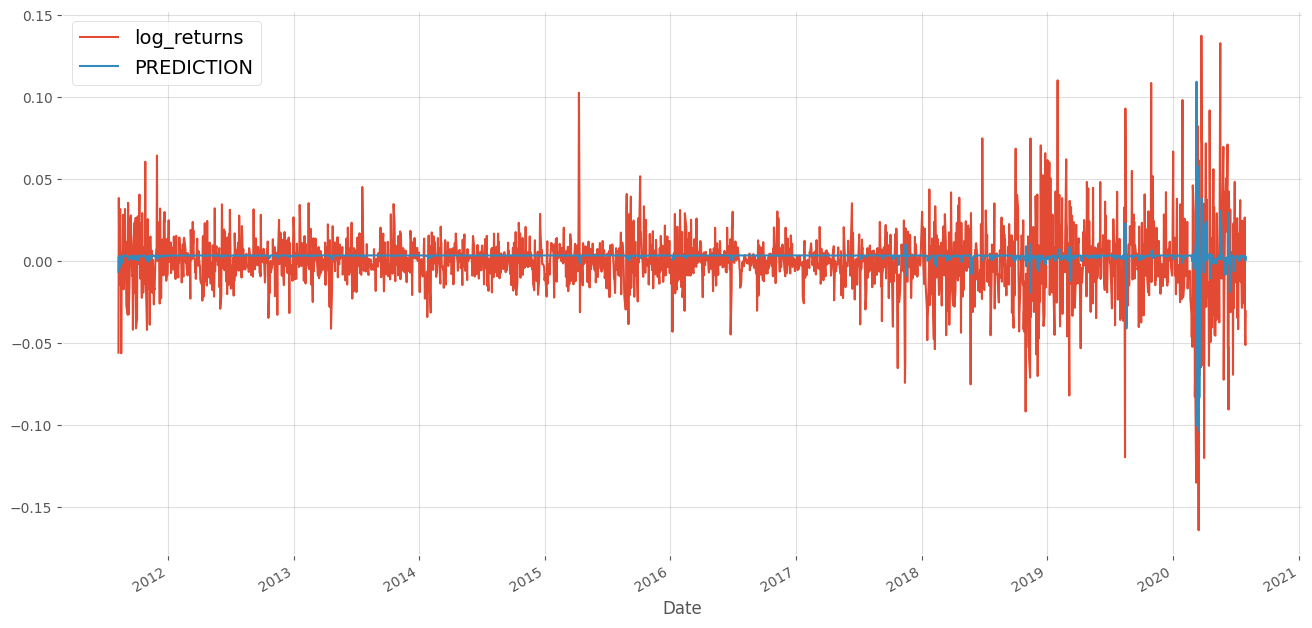

In [128]:
GE_LSTM \
    [["log_returns", "PREDICTION"]] \
    .iloc[LAGS: ] \
    .plot(figsize = (16, 8)
        )

Similar to the regression across the entire time series, most of the returns of the strategy comes during periods of high volatility

<Axes: xlabel='Date'>

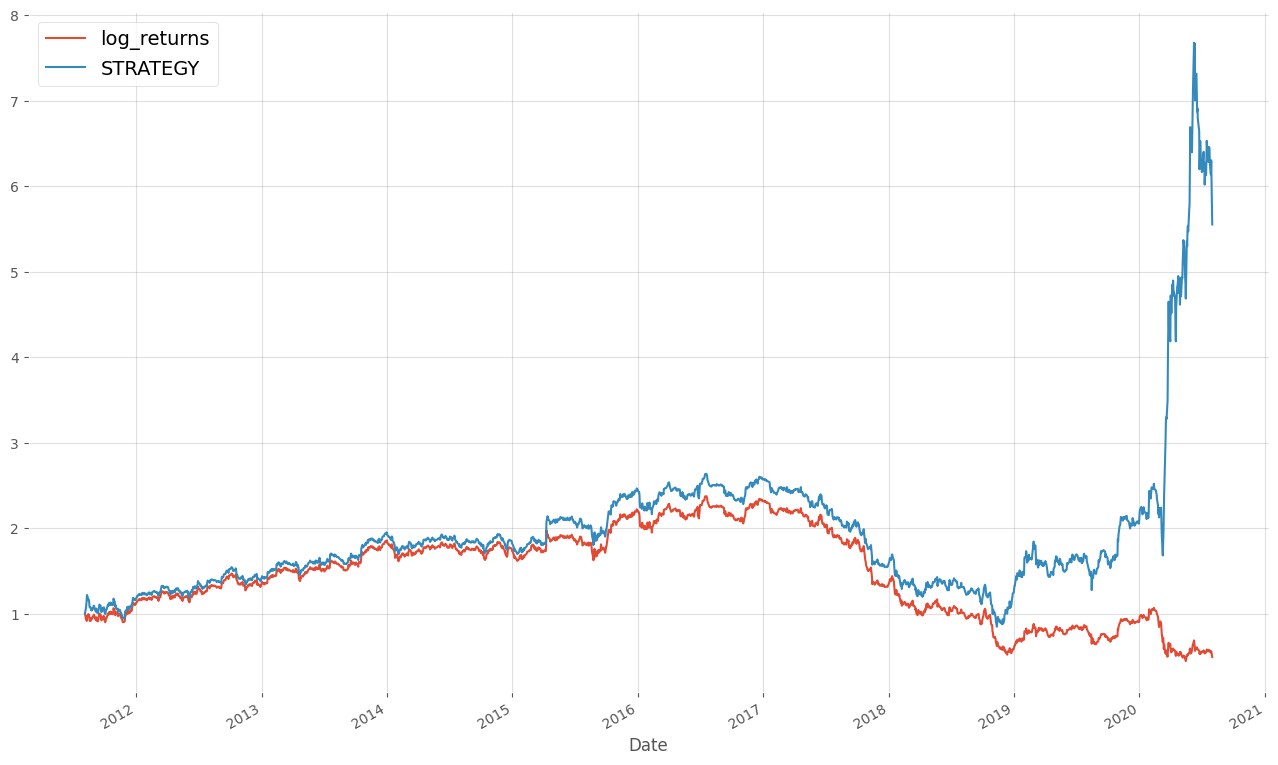

In [129]:
# Plot cumulative returns for both actual and strategy
GE_LSTM \
    [["log_returns", "STRATEGY"]] \
    .dropna() \
    .cumsum() \
    .apply(np.exp) \
    .plot(figsize = (16,10)
        )

Put all the above into a function

In [130]:
def calculate_LSTM_returns (tickers=tickers, 
                            start=start, 
                            end=end, 
                            n_steps=n_steps):
    
    # Download price data
    LSTM_df = yf.download(tickers, start=start, end=end)
    LSTM_df=LSTM_df[["Adj Close"]]
    
    # Calculate log returns
    LSTM_df["log_returns"] =\
    (
        np
        .log(LSTM_df["Adj Close"] / LSTM_df["Adj Close"].shift(1)
            )
    )
    
    LSTM_df = LSTM_df.dropna()
    
    X, y = list(), list()
    for i in range(len(LSTM_df["log_returns"])):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the sequence
        if end_ix > len(LSTM_df["log_returns"])-1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = LSTM_df["log_returns"][i:end_ix], LSTM_df["log_returns"][end_ix]
        X.append(seq_x)
        y.append(seq_y)
        
    X=array(X)
    y=array(y)

    X = X.reshape((X.shape[0], X.shape[1], n_features))

    # define model
    model = Sequential()
    model.add(LSTM(50, activation='relu', 
                   return_sequences=False, 
                   input_shape=(n_steps, n_features)))
    model.add(Dense(1))
    model.compile(optimizer='adam', 
                  loss='mse')

    # fit model
    model.fit(X, y, epochs=200, verbose=0)

    LSTM_df["PREDICTION"]=np.nan
    for row in range (n_steps,len(LSTM_df)):
        x_input=X[row-n_steps]
        x_input = x_input.reshape((1, n_steps, n_features))
        yhat = model.predict(x_input, verbose=0)
        LSTM_df.iloc[row, LSTM_df.columns.get_loc("PREDICTION")]=yhat


    
    # Predict direction (sign of predicted returns)
    LSTM_df["PREDICTED_DIRECTION"]=np.sign(LSTM_df["PREDICTION"])
    
    # Strategy returns based on predicted direction
    LSTM_df["STRATEGY"] = LSTM_df["PREDICTED_DIRECTION"] * LSTM_df["log_returns"]
    
    LSTM_df["STRATEGY_CUMULATIVE_RETURNS"] = LSTM_df["STRATEGY"].cumsum().apply(np.exp)
    
    ACCURACY =\
        np \
        .sign(LSTM_df["log_returns"] * LSTM_df["PREDICTION"]
            ) \
        .value_counts(normalize=True)
    
    print(ACCURACY)
    
    
    # Plot predicted returns against actual returns
    fig = go.Figure()

    fig.add_trace(go.Scatter(
        x=LSTM_df.index[LAG:], 
        y=LSTM_df["log_returns"].iloc[LAG:], 
        mode='lines', 
        name='Log Returns'
    ))

    fig.add_trace(go.Scatter(
        x=LSTM_df.index[LAG:], 
        y=LSTM_df["PREDICTION"].iloc[LAG:], 
        mode='lines', 
        name='Prediction'
    ))

    fig.update_layout(
        title="Actual vs Predicted Log Returns",
        xaxis_title="Date",
        yaxis_title="Log Returns",
        width=1200, 
        height=500
    )

    fig.show()
    
    # Plot cumulative returns of strategy against underlying asset
    cumulative_returns = LSTM_df[["log_returns", "STRATEGY"]].dropna().cumsum().apply(np.exp)
    
    fig = go.Figure()

    fig.add_trace(go.Scatter(
        x=cumulative_returns.index, 
        y=cumulative_returns["log_returns"], 
        mode='lines', 
        name='Cumulative Log Returns'
    ))

    fig.add_trace(go.Scatter(
        x=cumulative_returns.index, 
        y=cumulative_returns["STRATEGY"], 
        mode='lines', 
        name='Cumulative Strategy Returns'
    ))

    fig.update_layout(
        title="Cumulative Returns: Actual vs Strategy",
        xaxis_title="Date",
        yaxis_title="Cumulative Returns",
        width=1200, 
        height=600
    )

    fig.show()
        
    return LSTM_df

In [131]:
GE_LSTM_lag3 = calculate_LSTM_returns(tickers="GE", 
                                      start=start, 
                                      end=end, 
                                      n_steps=3)

[*********************100%%**********************]  1 of 1 completed


 1.0    0.496463
-1.0    0.486737
 0.0    0.016799
Name: proportion, dtype: float64


In [132]:
GE_LSTM_lag10 = calculate_LSTM_returns(tickers="GE", 
                                      start=start, 
                                      end=end, 
                                      n_steps=10)

[*********************100%%**********************]  1 of 1 completed


 1.0    0.506874
-1.0    0.476275
 0.0    0.016851
Name: proportion, dtype: float64


In [133]:
GE_LSTM_lag22 = calculate_LSTM_returns(tickers="GE", 
                                      start=start, 
                                      end=end, 
                                      n_steps=22)

[*********************100%%**********************]  1 of 1 completed


 1.0    0.496210
-1.0    0.486848
 0.0    0.016942
Name: proportion, dtype: float64


# ARIMA

In [134]:
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from math import sqrt
from sklearn.metrics import mean_squared_error

In [135]:
tickers="GE"

In [136]:
start="2011-08-01"
end="2020-08-01"

In [137]:
# Download price data
ARIMA_df = yf.download(tickers, start=start, end=end)
ARIMA_df=ARIMA_df[["Adj Close"]]

[*********************100%%**********************]  1 of 1 completed


In [138]:
# Calculate log returns
ARIMA_df["log_returns"] =\
(
    np
    .log(ARIMA_df["Adj Close"] / ARIMA_df["Adj Close"].shift(1)
        )
)

In [139]:
ARIMA_df

Adj Close  log_returns
Date                              
2011-08-01  65.553505          NaN
2011-08-02  62.781063    -0.043213
2011-08-03  63.729530     0.014995
2011-08-04  60.081585    -0.058945
2011-08-05  60.227524     0.002426
...               ...          ...
2020-07-27  32.847603    -0.022108
2020-07-28  33.728764     0.026472
2020-07-29  32.260159    -0.044518
2020-07-30  30.644712    -0.051373
2020-07-31  29.714600    -0.030822

[2266 rows x 2 columns]

In [140]:
ARIMA_df = ARIMA_df.dropna()

In [141]:
#set up paramaters for ARIMA 
validation_size = 0.20

In [142]:
train_size =\
        int(len(ARIMA_df)
           *
            (1 - validation_size)
           )

In [143]:
train, test =\
        (
            ARIMA_df["log_returns"].iloc[0: train_size],
            ARIMA_df["log_returns"].iloc[train_size:]
        )

In [144]:
train

Date
2011-08-02   -0.043213
2011-08-03    0.014995
2011-08-04   -0.058945
2011-08-05    0.002426
2011-08-08   -0.067653
                ...   
2018-10-05    0.040253
2018-10-08    0.032104
2018-10-09   -0.004418
2018-10-10   -0.020127
2018-10-11   -0.043084
Name: log_returns, Length: 1812, dtype: float64

In [145]:
test

Date
2018-10-12   -0.031952
2018-10-15   -0.013894
2018-10-16   -0.004124
2018-10-17    0.007411
2018-10-18    0.015466
                ...   
2020-07-27   -0.022108
2020-07-28    0.026472
2020-07-29   -0.044518
2020-07-30   -0.051373
2020-07-31   -0.030822
Name: log_returns, Length: 453, dtype: float64

#### ARIMA with an arbitrary amount for p,d,q

In [146]:
history = [x for x in train]
predictions = list()
# walk-forward validation
for t in range(len(test)):
    model = ARIMA(history, order=(1,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    #print('predicted=%f, expected=%f' % (yhat, obs))

predictions = pd.DataFrame(predictions, 
                           index=test.index, 
                           columns=["PREDICTION"])

# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 0.042


In [147]:
len(predictions)

453

In [148]:
predictions = pd.DataFrame(predictions, 
                           index=test.index, 
                           columns=["PREDICTION"])

In [149]:
predictions

PREDICTION
Date                  
2018-10-12   -0.031944
2018-10-15   -0.037353
2018-10-16   -0.022650
2018-10-17   -0.008857
2018-10-18    0.001826
...                ...
2020-07-27   -0.013201
2020-07-28   -0.024196
2020-07-29   -0.000269
2020-07-30   -0.005361
2020-07-31   -0.047604

[453 rows x 1 columns]

In [150]:
def assess_ARIMA_model(train, test, order):
    history = [x for x in train]
    predictions = list()
    # walk-forward validation
    for t in range(len(test)):
        model = ARIMA(history, order=order)
        model_fit = model.fit()
        output = model_fit.forecast()
        yhat = output[0]
        predictions.append(yhat)
        obs = test[t]
        history.append(obs)
        #print('predicted=%f, expected=%f' % (yhat, obs))

    # evaluate forecasts
    rmse = sqrt(mean_squared_error(test, predictions))
    print('Test RMSE: %.5f' % rmse)
    
    return rmse

In [151]:
# evaluate combinations of p, d and q values for an ARIMA model
def assess_models(train, test, p_values, d_values, q_values):

    best_score, best_cfg = float("inf"), None
    
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
        
                try:
                    mse = assess_ARIMA_model(train, test, order)
                    if mse < best_score:
                        best_score, best_cfg = mse, order
                        print('ARIMA%s MSE=%.5f' % (order,mse))
                except:
                    continue
    
    print('Best ARIMA%s MSE=%.3f' % (best_cfg, best_score))

In [152]:
p_values = [0, 1, 2]
d_values = range(0, 2)  # This just means 0 and 1
q_values = range(0, 2)  # This just means 0 and 1

ARIMA is not the best model to use in this case, as it is essentially using just the simple average of all the past returns to make one day ahead return prediction

In [153]:
assess_models(train, test, p_values, d_values, q_values)

Test RMSE: 0.03507
ARIMA(0, 0, 0) MSE=0.03507
Test RMSE: 0.03511
Test RMSE: 0.05163
Test RMSE: 0.03511
Test RMSE: 0.03510
Test RMSE: 0.03517
Test RMSE: 0.04199
Test RMSE: 0.03537
Test RMSE: 0.03508
Test RMSE: 0.03531
Test RMSE: 0.03966
Test RMSE: 0.03511
Best ARIMA(0, 0, 0) MSE=0.035


In [154]:
train

Date
2011-08-02   -0.043213
2011-08-03    0.014995
2011-08-04   -0.058945
2011-08-05    0.002426
2011-08-08   -0.067653
                ...   
2018-10-05    0.040253
2018-10-08    0.032104
2018-10-09   -0.004418
2018-10-10   -0.020127
2018-10-11   -0.043084
Name: log_returns, Length: 1812, dtype: float64

In [155]:
test

Date
2018-10-12   -0.031952
2018-10-15   -0.013894
2018-10-16   -0.004124
2018-10-17    0.007411
2018-10-18    0.015466
                ...   
2020-07-27   -0.022108
2020-07-28    0.026472
2020-07-29   -0.044518
2020-07-30   -0.051373
2020-07-31   -0.030822
Name: log_returns, Length: 453, dtype: float64

In [156]:
history = [x for x in train]
predictions = list()
# walk-forward validation
for t in range(len(test)):
    model = ARIMA(history, order=(0,0,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))

predictions = pd.DataFrame(predictions, 
                           index=test.index, 
                           columns=["PREDICTION"])

# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

predicted=-0.000059, expected=-0.031952
predicted=-0.000077, expected=-0.013894
predicted=-0.000085, expected=-0.004124
predicted=-0.000087, expected=0.007411
predicted=-0.000083, expected=0.015466
predicted=-0.000074, expected=0.014435
predicted=-0.000066, expected=-0.014435
predicted=-0.000074, expected=0.024732
predicted=-0.000060, expected=-0.041840
predicted=-0.000083, expected=-0.030874
predicted=-0.000100, expected=-0.043297
predicted=-0.000124, expected=-0.012467
predicted=-0.000131, expected=-0.091911
predicted=-0.000181, expected=-0.007890
predicted=-0.000185, expected=-0.052858
predicted=-0.000214, expected=-0.030739
predicted=-0.000231, expected=-0.001077
predicted=-0.000231, expected=0.014973
predicted=-0.000223, expected=-0.023631
predicted=-0.000236, expected=-0.010929
predicted=-0.000242, expected=-0.058840
predicted=-0.000274, expected=-0.071243
predicted=-0.000312, expected=0.074734
predicted=-0.000271, expected=-0.034262
predicted=-0.000290, expected=-0.018193
predic

In [157]:
predictions

PREDICTION
Date                  
2018-10-12   -0.000059
2018-10-15   -0.000077
2018-10-16   -0.000085
2018-10-17   -0.000087
2018-10-18   -0.000083
...                ...
2020-07-27   -0.000301
2020-07-28   -0.000311
2020-07-29   -0.000299
2020-07-30   -0.000318
2020-07-31   -0.000341

[453 rows x 1 columns]

In [158]:
ARIMA_df

Adj Close  log_returns
Date                              
2011-08-02  62.781063    -0.043213
2011-08-03  63.729530     0.014995
2011-08-04  60.081585    -0.058945
2011-08-05  60.227524     0.002426
2011-08-08  56.287727    -0.067653
...               ...          ...
2020-07-27  32.847603    -0.022108
2020-07-28  33.728764     0.026472
2020-07-29  32.260159    -0.044518
2020-07-30  30.644712    -0.051373
2020-07-31  29.714600    -0.030822

[2265 rows x 2 columns]

In [159]:
Predicted_Tuned = pd.merge(ARIMA_df,
                           predictions,
                           left_index=True,
                           right_index=True,
                           how="inner")

In [160]:
# Predict direction (sign of predicted returns)
Predicted_Tuned["PREDICTED_DIRECTION"] =\
    (
        np.sign(Predicted_Tuned["PREDICTION"])
    )

# Strategy returns based on predicted direction
Predicted_Tuned["STRATEGY"] =\
    (
        Predicted_Tuned["PREDICTED_DIRECTION"] 
        * 
        Predicted_Tuned["log_returns"]
    )

Predicted_Tuned["STRATEGY_CUMULATIVE_RETURNS"] =\
    (
        Predicted_Tuned["STRATEGY"]
        .cumsum()
        .apply(np.exp)
    )

In [161]:
Predicted_Tuned

Adj Close  log_returns  PREDICTION  PREDICTED_DIRECTION  STRATEGY  \
Date                                                                            
2018-10-12  57.535973    -0.031952   -0.000059                 -1.0  0.031952   
2018-10-15  56.742069    -0.013894   -0.000077                 -1.0  0.013894   
2018-10-16  56.508556    -0.004124   -0.000085                 -1.0  0.004124   
2018-10-17  56.928871     0.007411   -0.000087                 -1.0 -0.007411   
2018-10-18  57.816185     0.015466   -0.000083                 -1.0 -0.015466   
...               ...          ...         ...                  ...       ...   
2020-07-27  32.847603    -0.022108   -0.000301                 -1.0  0.022108   
2020-07-28  33.728764     0.026472   -0.000311                 -1.0 -0.026472   
2020-07-29  32.260159    -0.044518   -0.000299                 -1.0  0.044518   
2020-07-30  30.644712    -0.051373   -0.000318                 -1.0  0.051373   
2020-07-31  29.714600    -0.030822   -0.000341                 -1.0  0.030822   

            STRATEGY_CUMULATIVE_RETURNS  
Date                                     
2018-10-12                     1.032468  
2018-10-15                     1.046913  
2018-10-16                     1.051240  
2018-10-17                     1.043478  
2018-10-18                     1.027464  
...                                 ...  
2020-07-27                     1.808474  
2020-07-28                     1.761228  
2020-07-29                     1.841405  
2020-07-30                     1.938476  
2020-07-31                     1.999153  

[453 rows x 6 columns]

Predicted returns is just a (almost) straight line

In [162]:
# Plot predicted returns against actual returns
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=Predicted_Tuned.index[LAG:], 
    y=Predicted_Tuned["log_returns"].iloc[LAG:], 
    mode='lines', 
    name='Log Returns'
))

fig.add_trace(go.Scatter(
    x=Predicted_Tuned.index[LAG:], 
    y=Predicted_Tuned["PREDICTION"].iloc[LAG:], 
    mode='lines', 
    name='Prediction'
))

fig.update_layout(
    title="Actual vs Predicted Log Returns",
    xaxis_title="Date",
    yaxis_title="Log Returns",
    width=1200, 
    height=500
)

fig.show()

In [163]:
# Plot cumulative returns of strategy against underlying asset
cumulative_returns = \
    (
        Predicted_Tuned[["log_returns", "STRATEGY"]]
        .dropna()
        .cumsum()
        .apply(np.exp)
    )

fig = go.Figure()

fig.add_trace(go.Scatter(
    x=cumulative_returns.index, 
    y=cumulative_returns["log_returns"], 
    mode='lines', 
    name='Cumulative Log Returns'
))

fig.add_trace(go.Scatter(
    x=cumulative_returns.index, 
    y=cumulative_returns["STRATEGY"], 
    mode='lines', 
    name='Cumulative Strategy Returns'
))

fig.update_layout(
    title="Cumulative Returns: Actual vs Strategy",
    xaxis_title="Date",
    yaxis_title="Cumulative Returns",
    width=1200,  
    height=600
)

fig.show()

###  <font color = blue> 👉 Question 6. </font> Now, let's define performance metrics for accuracy.

### In Chapter 4 of the Lesson 5 lecture note, we calculated accuracy with the operational knowledge that, while it's theoretically possible for both returns and predictions to be positive, negative, or zero, only returns contained zero values. Predictions, on the other hand, did not include zeros; as a result, we considered them invalid predictions rather than irrelevant.

### Below, you will find two prototype functions (namely, `calculate_accuracy_A` and `calculate_accuracy_B`) that you can adapt for accuracy calculations. Please evaluate both functions and decide which one you prefer to use as a prototype for your work. Subsequently, explain why you favor the specific function for assessing accuracy.

### Then, using the chosen prototype of function, revise it and execute to assess the accuracy of the predictions obtained from the above lags approaches.

In [164]:
'''
This looks better from a mathematical standpoint, as we are performing a regression (predicting continuous variables) 
but how would you choose your tolerance level though?

Anyway, a glance at the chart already tells you your predicted returns are near zero and very much less volatile than the actual returns. 
So for any reasonable tolerance level, it would depend more on the actual returns being near zero rather than the predicted returns, 
for the prediction to be considered "accurate"

Anyway this is untradable, unless you buy one day or 0DTE options that gives the highest payout if your predicted returns materalizes.
Or you come up with a rule that says predicted amount has to be above a certain threshold for you to buy or below a certain threshold for you to sell.
'''

def calculate_accuracy_A(returns, predictions, tolerance):

    # Ensure returns and predictions have the same length
    assert len(returns) == len(predictions), "Returns and predictions must have the same length."

    # Initialize variables for valid and total predictions
    valid_predictions = 0
    total_predictions = len(returns)

    # Loop through each data point
    for i in range(total_predictions):
        # Check if the return is zero (valid) and the prediction is not zero (invalid)
        if returns[i] == 0 and predictions[i] != 0:
            valid_predictions += 1
        # Check if the return is not zero and the prediction matches closely (within a tolerance, if needed)
        elif returns[i] != 0 and abs(returns[i] - predictions[i]) < tolerance:
            valid_predictions += 1

    # Calculate accuracy
    accuracy_A = valid_predictions / total_predictions

    return accuracy_A

In [165]:
'''
This is better for classification problem rather than regression, calculating true positive, true negative, false positive, false negative
Can calculate precision/recall and F1 scores for this. 
There is less subjectivity in the accuracy score, it is not subject to an arbitrary threshold.
It is easier to trade on as well, if predicted returns is positive, we go long, if predicted returns is negative, we go short.
Considering our trading rule in question 5, this would be the better function
'''

def calculate_accuracy_B(returns_series, predictions_series):
    
    # Correct predictions
    correct_positive = (returns_series > 0) & (predictions_series > 0)
    correct_negative = (returns_series < 0) & (predictions_series < 0)
    correct_zero = (returns_series == 0) & (predictions_series == 0)

    total_correct = correct_positive.sum() + correct_negative.sum() + correct_zero.sum()

    # Incorrect predictions
    incorrect_positive_return = (returns_series > 0) & (predictions_series <= 0)
    incorrect_negative_return = (returns_series < 0) & (predictions_series >= 0)
    incorrect_zero_return = (returns_series == 0) & (predictions_series != 0)

    total_incorrect =\
    (
        incorrect_positive_return.sum()
        + incorrect_negative_return.sum()
        + incorrect_zero_return.sum()
    )

    # Calculate Hit
    accuracy_B = total_correct / (total_correct + total_incorrect)
    
    return accuracy_B

In [166]:
def modified_calculate_accuracy_B(returns_series, predictions_series):
    
    # Correct predictions
    correct_positive = (returns_series > 0) & (predictions_series > 0)
    correct_negative = (returns_series < 0) & (predictions_series < 0)
    correct_zero = (returns_series == 0) & (predictions_series == 0)

    total_correct = correct_positive.sum() + correct_negative.sum() + correct_zero.sum()

    # Incorrect predictions
    incorrect_positive_return = (returns_series > 0) & (predictions_series <= 0)
    incorrect_negative_return = (returns_series < 0) & (predictions_series >= 0)
    incorrect_zero_return = (returns_series == 0) & (predictions_series != 0)

    total_incorrect =\
    (
        incorrect_positive_return.sum()
        + incorrect_negative_return.sum()
        + incorrect_zero_return.sum()
    )

    # Calculate Hit
    accuracy_B = total_correct / (total_correct + total_incorrect)
    
    return total_correct,total_incorrect,accuracy_B

In [167]:
from sklearn.metrics import mean_absolute_error

In [168]:
# Mean Absolute Error metric used to evaluate the accuracy of a predictive model. 
# Abs difference between actual and predicted values
# 0 means perfect prediction
# Possible use of Mean Absolute Error Metric as the tolerance in Accuracy A function

mae_1 = mean_absolute_error(GE_lag3["log_returns"], GE_lag3["PREDICTION"])
mae_2 = mean_absolute_error(GE_lag10["log_returns"], GE_lag10["PREDICTION"])
mae_3 = mean_absolute_error(GE_lag22["log_returns"], GE_lag22["PREDICTION"])

print(mae_1)
print(mae_2)
print(mae_3)

0.012746437121526875
0.012692330838201574
0.012648901340814069


In [169]:
calculate_accuracy_A(GE_lag3["log_returns"],
                     GE_lag3["PREDICTION"], 
                     mae_1)

0.6728558797524314

In [170]:
calculate_accuracy_A(GE_lag10["log_returns"],
                     GE_lag10["PREDICTION"], 
                     mae_2)

0.6651884700665188

In [171]:
calculate_accuracy_A(GE_lag22["log_returns"],
                     GE_lag22["PREDICTION"], 
                     mae_3)

0.67142220240749

### Below are the lines of code that lead to an answer:

In [172]:
modified_calculate_accuracy_B(GE_lag3["log_returns"],
                              GE_lag3["PREDICTION"])

(1137, 1125, 0.5026525198938993)

In [173]:
modified_calculate_accuracy_B(GE_lag10["log_returns"],
                              GE_lag10["PREDICTION"])

(1137, 1118, 0.5042128603104213)

In [174]:
modified_calculate_accuracy_B(GE_lag22["log_returns"],
                              GE_lag22["PREDICTION"])

(1135, 1108, 0.5060187249219795)

### <font color = red> Answer 6 </font>
    The prediction is 1137 times correct and 1125 wrong. The accuracy is 50.26 % with a 3-day lag.
    
    The prediction is 1137 times correct and 1118 wrong. The accuracy is 50.42 % with a 10-day lag.
    
    The prediction is 1135 times correct and 1108 wrong. The accuracy is 50.60 % with a 22-day lag.
    

###  <font color = blue> 👉 Question 7. </font> Please calculate the Sharpe Ratio of the strategies for  `GE`.

### Below are the lines of code that lead to an answer:

In [175]:
def calculate_regression_Sharpe (dataframe:pd.DataFrame, 
                                 lag:int):

    Sharpe =\
        (
            (
            dataframe["STRATEGY"].mean() 
            / 
            dataframe["STRATEGY"].std()
            ) * np.sqrt(252)
        )
        
    print(f'The Sharpe Ratio from a {lag} day linear regression was {Sharpe:.2f}')

In [176]:
calculate_regression_Sharpe(dataframe=GE_lag3, 
                            lag=3)

The Sharpe Ratio from a 3 day linear regression was 0.16


In [177]:
calculate_regression_Sharpe(dataframe=GE_lag10, 
                            lag=10)

The Sharpe Ratio from a 10 day linear regression was 0.30


In [178]:
calculate_regression_Sharpe(dataframe=GE_lag22, 
                            lag=22)

The Sharpe Ratio from a 22 day linear regression was 0.66


### <font color = red> Answer 7 </font>

    The strategy for GE with a 3-day lag leads to a Sharpe ratio of 0.16 .
    
    The strategy for GE with a 3-day lag leads to a Sharpe ratio of 0.30 .
    
    The strategy for GE with a 3-day lag leads to a Sharpe ratio of 0.66 .

## 👇 Questions 8 to 10 ask you to build, execute, and backtest a momentum strategy.

###  <font color = blue> 👉 Question 8. </font> Our securities of interest are Goldman Sachs (`GS`) and JP Morgan Chase (`JPM`) stock. The time period for analysis is from November 2013 to October 2021.

### Here’s our use of the momentum indicator, reflecting the moving averages of stock prices for trend following.

### The two moving windows are 24 days and 58 days.

### Calculate and visualize the maximum drawdowns and the longest drawdown periods for `GS` and `JPM`.

### Below are the lines of code that lead to an answer:

In [179]:
def download_stock_data(ticker, start, end):
    stock_data = yf.download(ticker, start, end)
    stock_data["Tickers"] = ticker
    return stock_data[["Adj Close"]]

In [180]:
def download_stock_data(ticker, start, end):
    stock_data = yf.download(ticker, start, end)
    stock_data["Tickers"] = ticker
    return stock_data[["Adj Close"]]

In [181]:
def download_momentum_stock_data(ticker, start, end):

    stock_data = yf.download(ticker, start, end)   
    stock_data["Tickers"] = ticker
    return stock_data[["Adj Close", "Tickers"]]

In [182]:
def generate_momentum_signals(stock_df, short_window, long_window):
    
    df = stock_df.copy()
    
    # Calculate short-term and long-term SMAs
    df.loc[:, f"SMA_{short_window}"] = df["Adj Close"].rolling(window=short_window).mean()
    df.loc[:, f"SMA_{long_window}"] = df["Adj Close"].rolling(window=long_window).mean()
    
    # Generate buy/sell signals
    df.loc[:, "Signal"] = 0
    df.loc[:, "Signal"] = np.where(df[f"SMA_{short_window}"] > df[f"SMA_{long_window}"], 1.0, 0)
    df.loc[:, "Signal"] = np.where(df[f"SMA_{short_window}"] < df[f"SMA_{long_window}"], -1.0, df["Signal"])
    df.loc[:, "Position"] = df["Signal"].diff()
    
    df = df.dropna()
    
    return df

In [183]:
def plot_signals(stock_df, short_window, long_window):
    import matplotlib.pyplot as plt
    
    fig, ax = plt.subplots(figsize=(18, 6))
    
    ax.plot(stock_df.index, stock_df["Adj Close"], label="Adj Close", color="grey")
    ax.plot(stock_df.index, stock_df[f"SMA_{short_window}"], label=f"SMA_{short_window}", color="green")
    ax.plot(stock_df.index, stock_df[f"SMA_{long_window}"], label=f"SMA_{long_window}", color="red")
    
    # Plot buy signals
    ax.plot(stock_df[(stock_df["Position"] == 1) | (stock_df["Position"] == 2)].index, 
            stock_df[f"SMA_{short_window}"][(stock_df["Position"] == 1) | (stock_df["Position"] == 2)],
            "^", markersize=12, color="green", label="Buy Signal")
    
    # Plot sell signals
    ax.plot(stock_df[(stock_df["Position"] == -1) | (stock_df["Position"] == -2)].index, 
            stock_df[f"SMA_{short_window}"][(stock_df["Position"] == -1) | (stock_df["Position"] == -2)],
            "v", markersize=12, color="red", label="Sell Signal")
    
    ax.set_xlabel("Date")
    ax.set_ylabel("Price")
    ax.legend(loc="upper left")
    ax.set_title(f"Momentum Strategy: {short_window} vs {long_window} SMA")
    
    plt.show()

In [184]:
def calculate_strategy_returns(stock_df):
    stock_df["log_returns"] =\
    (
        np
        .log
        (
            stock_df["Adj Close"]
            /
            stock_df["Adj Close"].shift(1)
        )
    )

    stock_df["strategy_log_returns"] =\
    (
        stock_df["log_returns"]
        *
        stock_df["Signal"].shift(1) 
    )
    
    stock_df["strategy_cumulative_returns"] = \
        (
            stock_df["strategy_log_returns"]
            .cumsum()
            .apply(np.exp)
        )
    
    return stock_df

In [185]:
def calculate_drawdown(stock_df):
    
    stock_df["MAX_GROSS_PERFORMANCE"]=\
    (
        stock_df
        ["strategy_cumulative_returns"]
        .cummax()
    )
    
    stock_df[["strategy_cumulative_returns", "MAX_GROSS_PERFORMANCE"]].plot(figsize = [18, 7])
    
#     stock_df["DRAWDOWN"] =\
#     (
#         stock_df["MAX_GROSS_PERFORMANCE"] - stock_df["strategy_cumulative_returns"]
#     )

    stock_df["DRAWDOWN"] =\
    (
        #stock_df["MAX_GROSS_PERFORMANCE"] - stock_df["strategy_cumulative_returns"]
        stock_df["strategy_cumulative_returns"]/stock_df["MAX_GROSS_PERFORMANCE"] - 1
    )
    max_drawdown = -1*stock_df["DRAWDOWN"].min()

    periods =\
    (
        stock_df["DRAWDOWN"][stock_df["DRAWDOWN"] == 0].index[1 :  ].to_pydatetime()
        -
        stock_df["DRAWDOWN"][stock_df["DRAWDOWN"] == 0].index[  :-1].to_pydatetime()
    )
    
    current_drawdown_period =\
    (
        stock_df["DRAWDOWN"].index[-1].to_pydatetime()
        -
        stock_df["DRAWDOWN"][stock_df["DRAWDOWN"] == 0].index[-1].to_pydatetime()
    )

    max_drawdown_duration = max(periods.max(), current_drawdown_period)
    
    ticker = stock_df["Tickers"].iloc[-1]
    
    print(f"Max drawdown for {ticker} is {max_drawdown:.2%}")
    print(f"Max drawdown period for {ticker} is {max_drawdown_duration}")

In [186]:
def run_momentum_strategy(ticker, start, end, short_window = 24, long_window = 58):
    momentum_df = download_momentum_stock_data(ticker, start, end)
    momentum_df = generate_momentum_signals(momentum_df, short_window, long_window)  
    plot_signals(momentum_df, short_window, long_window)
    momentum_df = calculate_strategy_returns(momentum_df)
    calculate_drawdown(momentum_df)
    return momentum_df

### <font color = red> Answer 8 (`visualization component`) is presented in the cell below: </font>

[*********************100%%**********************]  1 of 1 completed


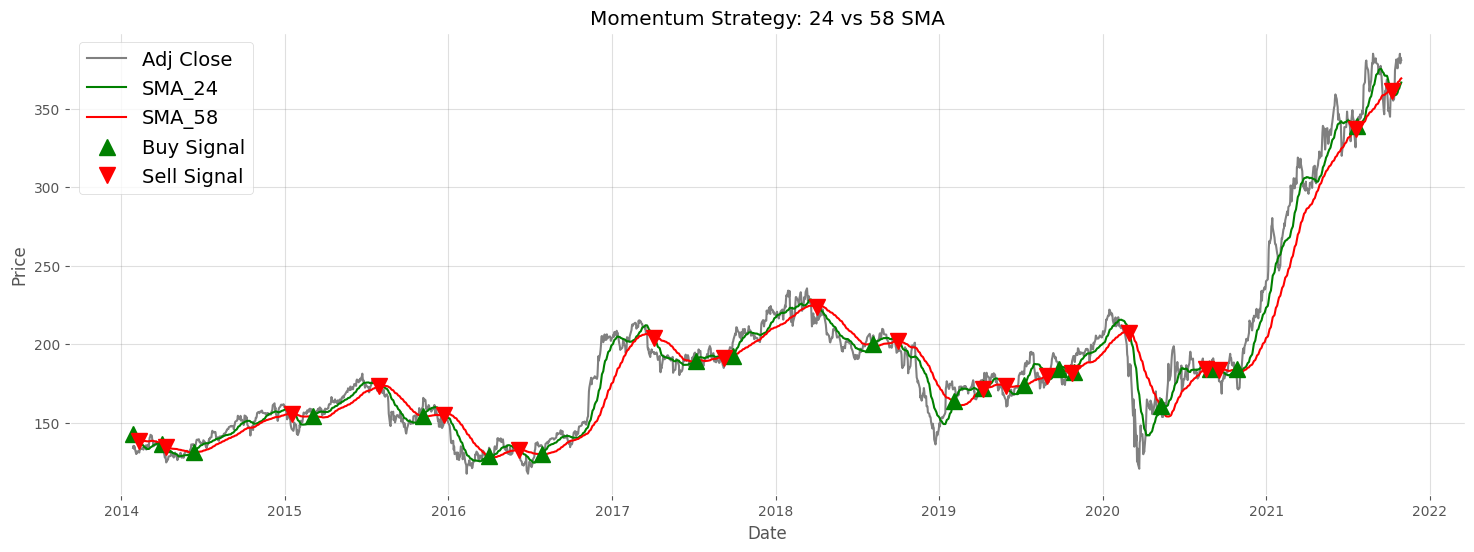

[*********************100%%**********************]  1 of 1 completed

Max drawdown for GS is 44.58%
Max drawdown period for GS is 752 days, 0:00:00


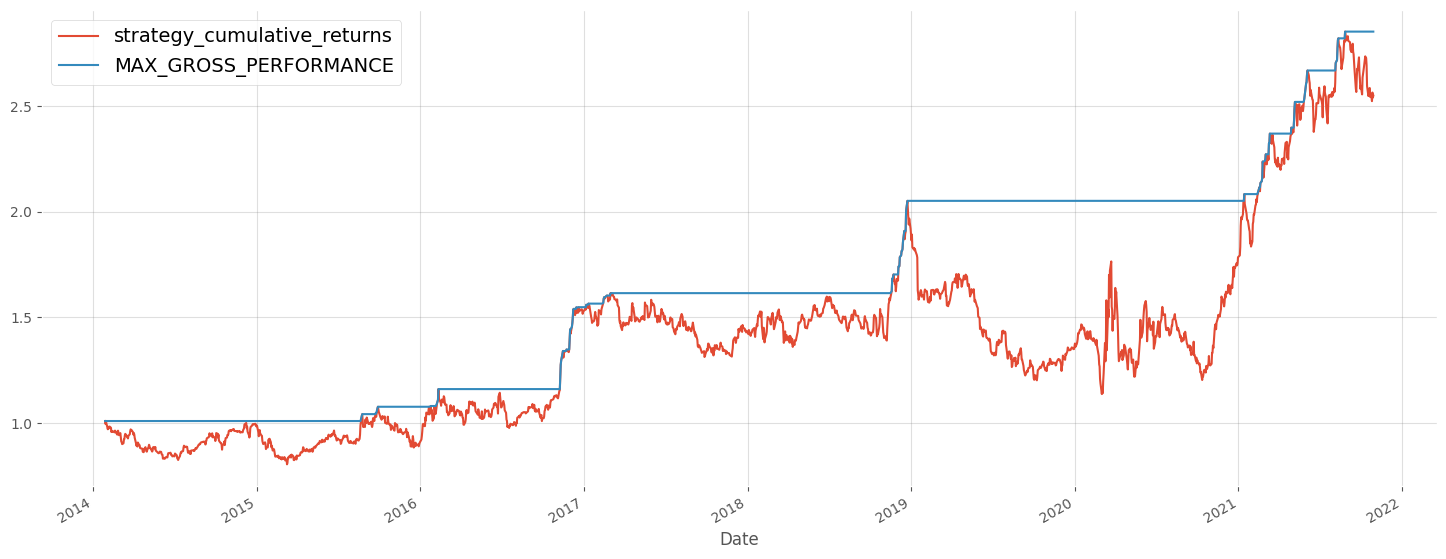

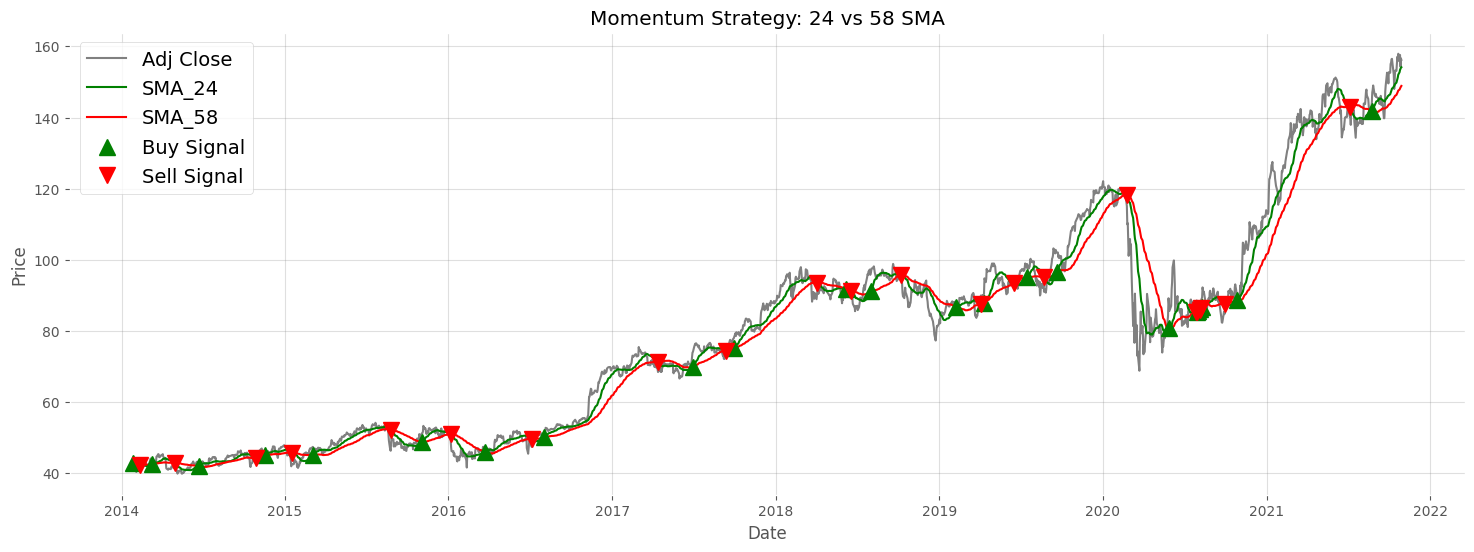

Max drawdown for JPM is 43.36%
Max drawdown period for JPM is 2198 days, 0:00:00


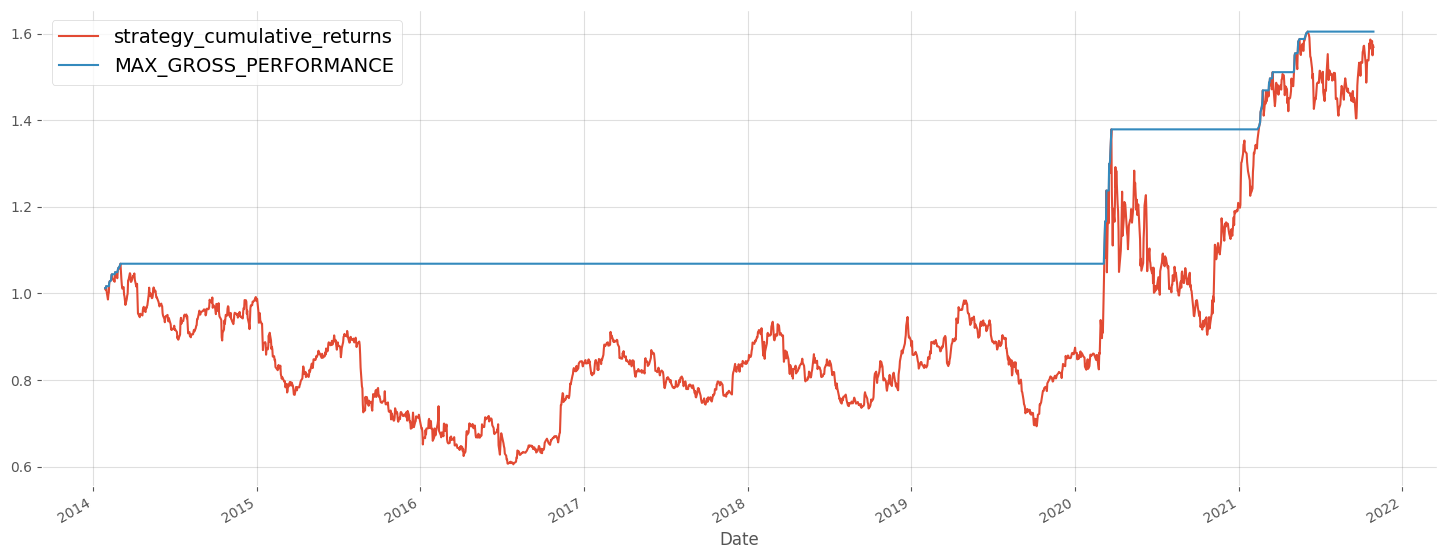

In [187]:
start = dt.datetime(2013, 11, 1)
end = dt.datetime(2021, 11, 1)

tickers_momentum = ["GS","JPM"]
final_momentum_df = {}
for ticker in tickers_momentum:
    final_momentum_df[ticker] = run_momentum_strategy(ticker, start, end, short_window = 24, long_window = 58)

###  <font color = blue> 👉 Question 9. </font>  If you had started with a capital of $300,000 for each of the TWO securities, how much would be left in your account after trading according to your above strategies for `GS` and `JPM`?

### Below are the lines of code that lead to an answer:

In [188]:
def calculate_final_capital(ticker, capital, final_momentum_df):
    
    bal = np.exp(final_momentum_df["strategy_log_returns"].sum()) * capital

    print(f"Final balance in Account for {ticker}:", bal)

In [189]:
tickers_momentum = ["GS","JPM"]
capital = 300000
for ticker in tickers_momentum:
    calculate_final_capital(ticker, 300000, final_momentum_df[ticker])

Final balance in Account for GS: 764946.5797785473
Final balance in Account for JPM: 470621.0933239378


# <font color = blue>  Finding the best fit of hyperparameters

In [190]:
def find_best_momentum_strategy(stock_data, ticker, initial_capital=300000, 
                                short_window_range=(10, 50), long_window_range=(20, 200)):
    best_capital = 0
    best_short_window = 0
    best_long_window = 0
    best_df = None

    for short_window in range(short_window_range[0], short_window_range[1] + 1):
        for long_window in range(short_window + 1, long_window_range[1] + 1):
            if long_window <= short_window:
                continue

            # Run the momentum strategy
            momentum_df = stock_data.copy()
            momentum_df = generate_momentum_signals(momentum_df, short_window, long_window)
            momentum_df = calculate_strategy_returns(momentum_df)

            # Calculate final capital
            final_capital = np.exp(momentum_df["strategy_log_returns"].sum()) * initial_capital

            if final_capital > best_capital:
                best_capital = final_capital
                best_short_window = short_window
                best_long_window = long_window
                best_df = momentum_df

#     # Run the best strategy again to generate plots and calculate drawdown
#     best_df = generate_momentum_signals(best_df, best_short_window, best_long_window)
#     plot_signals(best_df, best_short_window, best_long_window)
#     calculate_drawdown(best_df)

    print(f"Best strategy for {ticker}:")
    print(f"Short window: {best_short_window}")
    print(f"Long window: {best_long_window}")
    print(f"Final capital: ${best_capital:.2f}")

    return best_df, best_short_window, best_long_window, best_capital


In [191]:
tickers_momentum = ["GS", "JPM"]
results = {}

for ticker in tickers_momentum:
    # Download data once for each ticker
    stock_data = download_momentum_stock_data(ticker, start, end)
    results[ticker] = find_best_momentum_strategy(stock_data, ticker)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

Best strategy for GS:
Short window: 30
Long window: 60
Final capital: $1557874.19


Best strategy for JPM:
Short window: 40
Long window: 45
Final capital: $1194794.97


###  <font color = blue> 👉 Question 10. </font> Using the current momentum strategy, how many trading opportunities were there for GS and JPM?

### Below are the lines of code that lead to an answer:

In [192]:
def calculate_trade_count(ticker, final_momentum_df):
    trade_counts = final_momentum_df["Position"].value_counts()
    sum_of_significant_trades = trade_counts.loc[[-2, 2, 1]].sum()
    print(f"Total No of Trades for {ticker} is {sum_of_significant_trades}")

In [193]:
for ticker in tickers_momentum:
    calculate_trade_count(ticker, final_momentum_df[ticker])

Total No of Trades for GS is 38
Total No of Trades for JPM is 45


> 💯 “Thank you for putting your efforts into the individual assessment questions” 😊

In [194]:
np.log(105/100)

0.04879016416943205

In [195]:
np.exp(np.log(105/100))

1.05

In [196]:
-np.log(105/100)

-0.04879016416943205

In [197]:
np.exp(-np.log(105/100))

0.9523809523809523